# **Initialization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Hide all warnings
warnings.filterwarnings('ignore')

In [2]:
# Filepath init
filepath = 'https://github.com/gr-oll/susFin/raw/refs/heads/main/Data/'

# **Exercise 1**

In [3]:
# Install openpyxl if not already installed
#%pip install openpyxl

#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

# Extracting the data and formatting the dataset
monthly_return = pd.read_excel(filepath + 'DS_RI_USD_M.xlsx')
monthly_return_melted = monthly_return.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_return")
monthly_return_melted.rename(columns={'NAME': 'Name'}, inplace=True)

In [4]:
# Extracting the country-region dataset and merging it to the previous one
static = pd.read_excel(filepath + 'Static.xlsx')
df_ex1 = pd.merge(monthly_return_melted, static, on=['Name','ISIN'], how='outer')

In [5]:
# Filtering the rows of interest
df_ex1 = df_ex1[df_ex1['Region'] == 'PAC']
df_ex1 = df_ex1[(pd.to_datetime(df_ex1['year']) >= '2013-12-31') & (pd.to_datetime(df_ex1['year']) <= '2023-12-31')]

In [6]:
# Sorting to facilitate comprehension
df_ex1.sort_values(by=['Name', 'year'], inplace=True)

In [7]:
# New col with percentage change between two months
df_ex1['individual_monthly_return'] = df_ex1.groupby('Name')['monthly_return'].pct_change()

In [8]:
df_ex1

,Name,ISIN,year,monthly_return,Country,Region,individual_monthly_return
1074,77 BANK,JP3352000008,2013-12-31 00:00:00,0.68,JP,PAC,NaN
1075,77 BANK,JP3352000008,2014-01-31 00:00:00,0.66,JP,PAC,-0.029412
1076,77 BANK,JP3352000008,2014-02-28 00:00:00,0.62,JP,PAC,-0.060606
1077,77 BANK,JP3352000008,2014-03-31 00:00:00,0.64,JP,PAC,0.032258
1078,77 BANK,JP3352000008,2014-04-30 00:00:00,0.64,JP,PAC,0.000000
...,...,...,...,...,...,...,...
770389,YUEXIU PROPERTY COMPANY,HK0000745908,2023-08-31 00:00:00,62.82,HK,PAC,-0.055906
770390,YUEXIU PROPERTY COMPANY,HK0000745908,2023-09-29 00:00:00,58.43,HK,PAC,-0.069882
770391,YUEXIU PROPERTY COMPANY,HK0000745908,2023-10-31 00:00:00,54.23,HK,PAC,-0.071881
770392,YUEXIU PROPERTY COMPANY,HK0000745908,2023-11-30 00:00:00,47.52,HK,PAC,-0.123732


In [9]:
# Dropping the 31.12.2013 rows (not included in our timeframe but necessary for the pct_change of 31.12.2014)
df_ex1 = df_ex1[pd.to_datetime(df_ex1['year']).dt.year >= 2014]

In [10]:
# Filtering by non missing escores (2013-2024) complete dataset to allow comparisons
escore = pd.read_excel(filepath + 'DS_EScore_Y.xlsx')
melted_escore = escore.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="escore")
melted_escore.rename(columns={'NAME': 'Name'}, inplace=True)
melted_escore['year'] = pd.to_datetime(melted_escore['year'], format='%Y')
escore_interest = pd.merge(melted_escore, static, how='outer')
escore_interest = escore_interest[(escore_interest['year'] >= '2013-01-01') & (melted_escore['year'] <= '2024-12-31')]
escore_interest = escore_interest[escore_interest['Region'] == 'PAC']


In [11]:
escore_interest

,Name,ISIN,year,escore,Country,Region
89,77 BANK,JP3352000008,2013-01-01,15.25,JP,PAC
90,77 BANK,JP3352000008,2014-01-01,15.56,JP,PAC
91,77 BANK,JP3352000008,2015-01-01,18.65,JP,PAC
92,77 BANK,JP3352000008,2016-01-01,21.43,JP,PAC
93,77 BANK,JP3352000008,2017-01-01,22.29,JP,PAC
...,...,...,...,...,...,...
62402,YUEXIU PROPERTY COMPANY,HK0000745908,2019-01-01,85.79,HK,PAC
62403,YUEXIU PROPERTY COMPANY,HK0000745908,2020-01-01,83.72,HK,PAC
62404,YUEXIU PROPERTY COMPANY,HK0000745908,2021-01-01,80.73,HK,PAC
62405,YUEXIU PROPERTY COMPANY,HK0000745908,2022-01-01,76.96,HK,PAC


In [12]:
filtered = escore_interest.groupby('ISIN')['escore'].count().reset_index()
filtered = filtered[filtered['escore'] == 11]
filtered 


,ISIN,escore
1,AU000000ALL7,11
2,AU000000AMP6,11
3,AU000000ANN9,11
4,AU000000ANZ3,11
5,AU000000APA1,11
...,...,...
493,SG1T75931496,11
495,SG1V61937297,11
497,SG9999000020,11
499,SGXE21576413,11


In [13]:
interest_companies = filtered['ISIN'].tolist()


In [14]:
# Filtering df_ex1 to include only non missing escores
df_ex1 = df_ex1[df_ex1['ISIN'].isin(interest_companies)]

In [15]:
df_ex1[df_ex1['monthly_return'].isna()]
df_ex1

,Name,ISIN,year,monthly_return,Country,Region,individual_monthly_return
1075,77 BANK,JP3352000008,2014-01-31 00:00:00,0.66,JP,PAC,-0.029412
1076,77 BANK,JP3352000008,2014-02-28 00:00:00,0.62,JP,PAC,-0.060606
1077,77 BANK,JP3352000008,2014-03-31 00:00:00,0.64,JP,PAC,0.032258
1078,77 BANK,JP3352000008,2014-04-30 00:00:00,0.64,JP,PAC,0.000000
1079,77 BANK,JP3352000008,2014-05-30 00:00:00,0.68,JP,PAC,0.062500
...,...,...,...,...,...,...,...
770389,YUEXIU PROPERTY COMPANY,HK0000745908,2023-08-31 00:00:00,62.82,HK,PAC,-0.055906
770390,YUEXIU PROPERTY COMPANY,HK0000745908,2023-09-29 00:00:00,58.43,HK,PAC,-0.069882
770391,YUEXIU PROPERTY COMPANY,HK0000745908,2023-10-31 00:00:00,54.23,HK,PAC,-0.071881
770392,YUEXIU PROPERTY COMPANY,HK0000745908,2023-11-30 00:00:00,47.52,HK,PAC,-0.123732


In [16]:
# Individual handling of the 5 missings
df_ex1['individual_monthly_return'].loc[592512] = -1.
df_ex1['individual_monthly_return'].loc[592513] = np.nan
df_ex1['individual_monthly_return'].loc[592514] = np.nan
df_ex1['individual_monthly_return'].loc[592515] = np.nan
df_ex1['individual_monthly_return'].loc[698819] = -1.


In [17]:
# Creation of the averaged returns and their std + merge
annualization_mean = df_ex1.groupby('Name')['individual_monthly_return'].mean()
annualization_mean = pd.DataFrame(annualization_mean)
annualization_mean.rename(columns={'individual_monthly_return': 'monthly_mean'}, inplace=True)

annualization_var = df_ex1.groupby('Name')['individual_monthly_return'].std()
annualization_var = pd.DataFrame(annualization_var)
annualization_var.rename(columns={'individual_monthly_return': 'monthly_std'}, inplace=True)

annualization = pd.merge(annualization_mean, annualization_var, on='Name', how='outer')

In [18]:
# Creation of annualized cols
annualization['annualized_mean'] = annualization['monthly_mean'] * 12
annualization['annualized_std'] = annualization['monthly_std'] * np.sqrt(12)

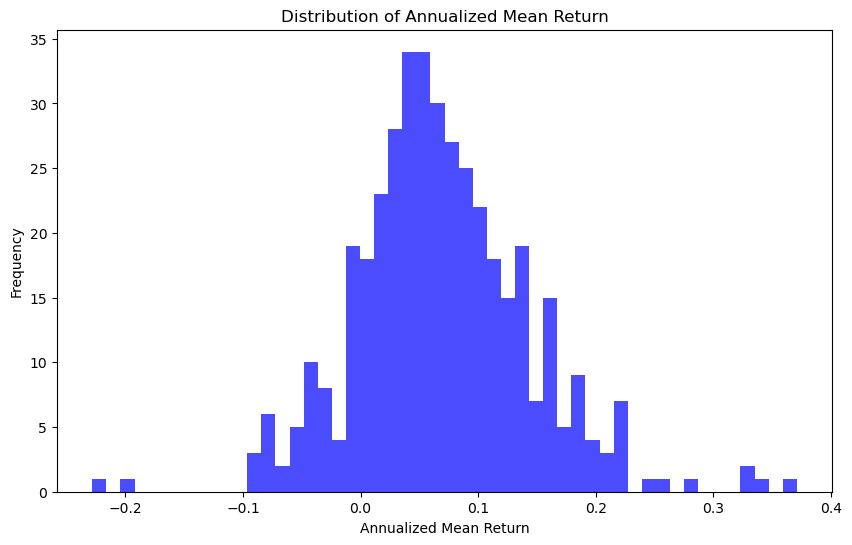

In [19]:
# Annualized mean histogram
plt.figure(figsize=(10, 6))
plt.hist(annualization['annualized_mean'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Annualized Mean Return')
plt.ylabel('Frequency')
plt.title('Distribution of Annualized Mean Return')
plt.show()

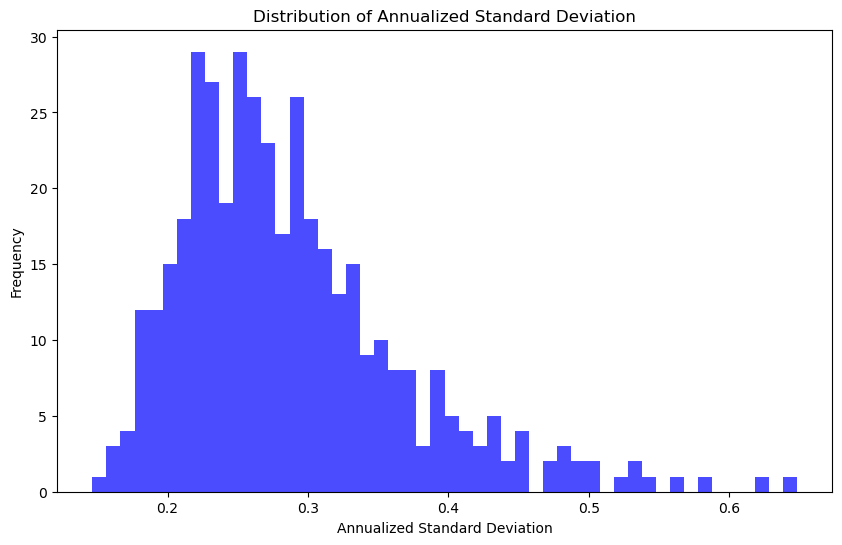

In [20]:
# Annualized std histogram
plt.figure(figsize=(10, 6))
plt.hist(annualization['annualized_std'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Annualized Standard Deviation')
plt.show()

In [21]:
# Variance-covariance matrix
np.corrcoef(annualization['annualized_mean'], annualization['annualized_std'])

array([[1.        , 0.08510139],
       [0.08510139, 1.        ]])

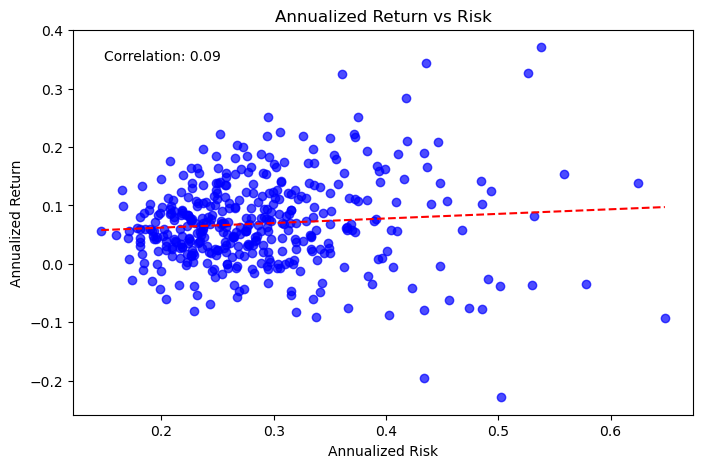

In [22]:
# Define annualized_returns DataFrame
annualized_returns = annualization[['annualized_std', 'annualized_mean']].rename(columns={'annualized_std': 'RISK', 'annualized_mean': 'RET_PCT'})

plt.figure(figsize=(8, 5))
plt.scatter(annualized_returns['RISK'], annualized_returns['RET_PCT'], color='blue', alpha=0.7)
plt.xlabel('Annualized Risk')
plt.ylabel('Annualized Return')
plt.title('Annualized Return vs Risk')

# Compute correlation
corr = annualized_returns['RISK'].corr(annualized_returns['RET_PCT'])

# Add a trendline
slope, intercept = np.polyfit(annualized_returns['RISK'], annualized_returns['RET_PCT'], 1)
x = np.linspace(annualized_returns['RISK'].min(), annualized_returns['RISK'].max(), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', linestyle='--', label='Trendline')

# Display correlation on the plot
plt.text(
    0.05, 0.95,
    f'Correlation: {corr:.2f}',
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top'
)

plt.show()

# **Exercise 2**

In [23]:
# Extracting and merging monthly datasets
#monthly returns with dididend payments
M_ret = pd.read_excel(filepath + 'DS_RI_USD_M.xlsx')
melted_M_ret = M_ret.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_return")
melted_M_ret['year'] = pd.to_datetime(melted_M_ret['year'], format='%Y-%m-%d')
#monthly market value
M_mval = pd.read_excel(filepath + 'DS_MV_USD_M.xlsx')
melted_M_mval = M_mval.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_market_value")
melted_M_mval['year'] = pd.to_datetime(melted_M_mval['year'], format='%Y-%m-%d')


In [24]:
# Risk-free rates dataset
risk_free = pd.read_excel(filepath + 'Risk_Free_Rate.xlsx')
risk_free.rename(columns={'Unnamed: 0': 'year'}, inplace=True)
risk_free['year'] = pd.to_datetime(risk_free['year'], format='%Y%m')

In [25]:
# Merging the datasets
df_ex2 = pd.merge(melted_M_ret, melted_M_mval, on=['NAME', 'ISIN', 'year'], how='outer')
df_ex2.rename(columns={'NAME': 'Name'}, inplace=True)
df_ex2 = pd.merge(df_ex2, static, on=['Name', 'ISIN'], how='outer')

In [26]:
# Filter region and years of interest
df_ex2 = df_ex2[df_ex2['Region'] == 'PAC']
df_ex2 = df_ex2[(df_ex2['year'] >= '2013-12-31') & (df_ex2['year'] <= '2023-12-31')]
df_ex2['year'] = pd.to_datetime(df_ex2['year'])

In [27]:
# Filter same companies as in ex1 (non missing escores from 2013 to 2024)
df_ex2 = df_ex2[df_ex2['ISIN'].isin(interest_companies)]

In [28]:
df_ex2[df_ex2['monthly_return'].isna()]

,Name,ISIN,year,monthly_return,monthly_market_value,Country,Region
592512,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-09-29,NaN,0.0,JP,PAC
592513,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-10-31,NaN,0.0,JP,PAC
592514,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-11-30,NaN,0.0,JP,PAC
592515,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-12-29,NaN,0.0,JP,PAC
698819,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2023-12-29,NaN,0.0,JP,PAC


In [29]:
# Returns percentage change and drop the 31.12.2013 rows
df_ex2['pct_monthly_return'] = df_ex2.groupby('Name')['monthly_return'].pct_change()
df_ex2 = df_ex2[pd.to_datetime(df_ex2['year']).dt.year >= 2014]

In [30]:
# Individual handling of the 5 missings
df_ex2['pct_monthly_return'].loc[592512] = -1.
df_ex2['pct_monthly_return'].loc[592513] = np.nan
df_ex2['pct_monthly_return'].loc[592514] = np.nan
df_ex2['pct_monthly_return'].loc[592515] = np.nan
df_ex2['pct_monthly_return'].loc[698819] = -1.


In [31]:
df_ex2[df_ex2['monthly_return'].isna()]

,Name,ISIN,year,monthly_return,monthly_market_value,Country,Region,pct_monthly_return
592512,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-09-29,NaN,0.0,JP,PAC,-1.0
592513,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-10-31,NaN,0.0,JP,PAC,NaN
592514,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-11-30,NaN,0.0,JP,PAC,NaN
592515,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-12-29,NaN,0.0,JP,PAC,NaN
698819,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2023-12-29,NaN,0.0,JP,PAC,-1.0


In [32]:
# Building the equally weighted portfolio
ew_pf = df_ex2.groupby('year')['pct_monthly_return'].sum().reset_index()

In [33]:
# Dividing the return by the number of assets for each month
ew_pf['ew_m_ret'] = 0
for month in df_ex2['year'].unique():
    ew_pf.loc[ew_pf['year'] == month, 'ew_m_ret'] = ew_pf.loc[ew_pf['year'] == month, 'pct_monthly_return'] / len(df_ex2[df_ex2['year'] == month]['Name'].unique())

In [34]:
# Calculate the market value share
df_ex2['mv_share'] = df_ex2['monthly_market_value'] / df_ex2.groupby('year')['monthly_market_value'].transform('sum')

In [35]:
# Weight the returns by the market value share shifted as in the exercise sheet
df_ex2['mv_return'] = df_ex2['pct_monthly_return'] * df_ex2['mv_share'].shift(1)

In [36]:
# Market value weighted portfolio
mw_pf = df_ex2.groupby('year')['mv_return'].sum().reset_index()

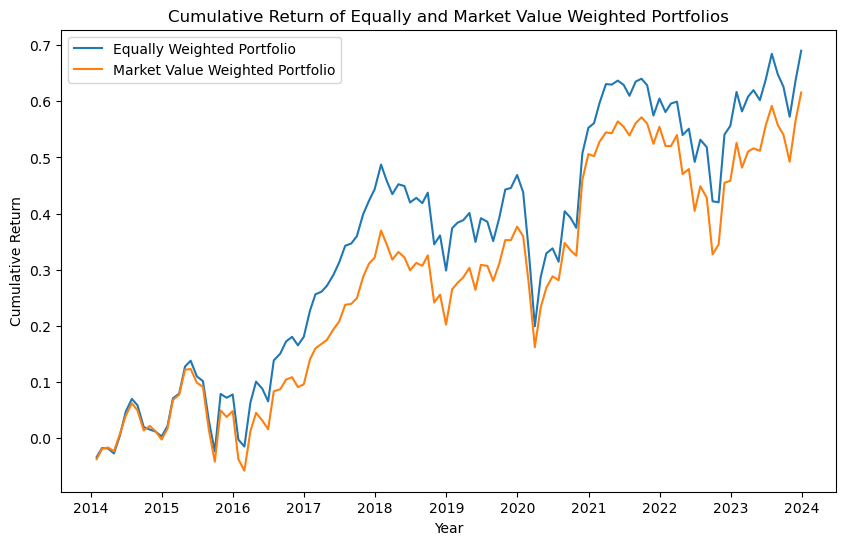

In [37]:
# Plot the monthly adapted returns for both portfolios
plt.figure(figsize=(10, 6))
plt.plot(ew_pf['year'], ew_pf['ew_m_ret'].cumsum(), label='Equally Weighted Portfolio')
plt.plot(mw_pf['year'], mw_pf['mv_return'].cumsum(), label='Market Value Weighted Portfolio')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Equally and Market Value Weighted Portfolios')
plt.legend()
plt.show()

In [38]:
# Risk free rate in the given period 
risk_free = risk_free[(pd.to_datetime(risk_free['year']).dt.year >= 2014) & (pd.to_datetime(risk_free['year']).dt.year <= 2023)]
# Annualized risk free rate
ann_rf = risk_free['RF'].mean() * 12 / 100

In [39]:
# Statistics of interest Equally Weighted Portfolio
# Annualized return
ew_ann_ret = ew_pf['ew_m_ret'].mean() * 12
# Annualized std
ew_ann_std = ew_pf['ew_m_ret'].std() * np.sqrt(12)
#min return
ew_min_ret = ew_pf['ew_m_ret'].min()
#max return
ew_max_ret = ew_pf['ew_m_ret'].max()

# Statistics of interest Market Value Weighted Portfolio
# Annualized return
mw_ann_ret = mw_pf['mv_return'].mean() * 12
# Annualized std
mw_ann_std = mw_pf['mv_return'].std() * np.sqrt(12)
#min return
mw_min_ret = mw_pf['mv_return'].min()
#max return
mw_max_ret = mw_pf['mv_return'].max()


In [40]:
# Equally weighted Sharpe Ratio
ew_sharpe = (ew_ann_ret - ann_rf)/ ew_ann_std
ew_sharpe

0.38387887979603214

In [41]:
# Value weighted Sharpe Ratio
mw_sharpe = (mw_ann_ret - ann_rf)/ mw_ann_std
mw_sharpe


0.35568049703395765

In [42]:
statistics = pd.DataFrame({'Portfolio': ['Equally Weighted', 'Market Value Weighted'],
                           'Annualized Return': [ew_ann_ret, mw_ann_ret],
                           'Annualized Standard Deviation': [ew_ann_std, mw_ann_std],
                           'Sharpe Ratio': [ew_sharpe, mw_sharpe],
                           'Min Return': [ew_min_ret, mw_min_ret],
                           'Max Return': [ew_max_ret, mw_max_ret]})
statistics

,Portfolio,Annualized Return,Annualized Standard Deviation,Sharpe Ratio,Min Return,Max Return
0,Equally Weighted,0.069011,0.149373,0.383879,-0.136916,0.132389
1,Market Value Weighted,0.061567,0.140286,0.355680,-0.115458,0.135156


In [43]:
'''delisted = ['A2B AUSTRALIA DEAD - DELIST.12/04/24',
       'BENESSE HOLDINGS DEAD - DELIST.17/05/24',
       'CSR DEAD - DEAD.10/07/24', 'J S R DEAD - DELIST.25/06/24',
       'LAWSON DEAD - DELIST.24/07/24',
       'SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23',
       'TOSHIBA DEAD - DELIST.20/12/23']'''

"delisted = ['A2B AUSTRALIA DEAD - DELIST.12/04/24',\n       'BENESSE HOLDINGS DEAD - DELIST.17/05/24',\n       'CSR DEAD - DEAD.10/07/24', 'J S R DEAD - DELIST.25/06/24',\n       'LAWSON DEAD - DELIST.24/07/24',\n       'SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23',\n       'TOSHIBA DEAD - DELIST.20/12/23']"

In [44]:
annualization = annualization.reset_index()

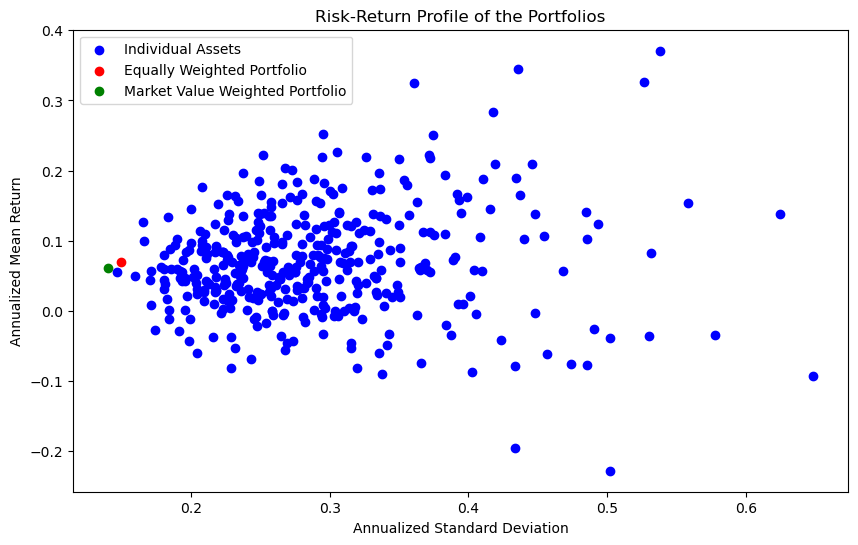

In [45]:
# Define the list of delisted companies
delisted = ['A2B AUSTRALIA DEAD - DELIST.12/04/24',
			'BENESSE HOLDINGS DEAD - DELIST.17/05/24',
			'CSR DEAD - DEAD.10/07/24', 
			'J S R DEAD - DELIST.25/06/24',
			'LAWSON DEAD - DELIST.24/07/24',
			'SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23',
			'TOSHIBA DEAD - DELIST.20/12/23']

plt.figure(figsize=(10, 6))
plt.scatter(annualization['annualized_std'], annualization['annualized_mean'], color='blue', label='Individual Assets')
#plt.scatter(annualization[annualization['Name'].isin(delisted)]['annualized_std'], annualization[annualization['Name'].isin(delisted)]['annualized_mean'], color='cyan')
plt.scatter(ew_ann_std, ew_ann_ret, color='red', label='Equally Weighted Portfolio')
plt.scatter(mw_ann_std, mw_ann_ret, color='green', label='Market Value Weighted Portfolio')
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Mean Return')
plt.title('Risk-Return Profile of the Portfolios')
plt.legend()
plt.savefig('riskreturn.png')
plt.show()

# **Exercise 3**

In [46]:
# Extracting and merging monthly datasets
#monthly returns with dididend payments
M_ret = pd.read_excel(filepath + 'DS_RI_USD_M.xlsx')
melted_M_ret = M_ret.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_return")
melted_M_ret['year'] = pd.to_datetime(melted_M_ret['year'], format='%Y-%m-%d')

In [47]:
#monthly market value
M_mval = pd.read_excel(filepath + 'DS_MV_USD_M.xlsx')
melted_M_mval = M_mval.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_market_value")
melted_M_mval['year'] = pd.to_datetime(melted_M_mval['year'], format='%Y-%m-%d')


In [48]:
# Merging the datasets
df_ex3 = pd.merge(melted_M_ret, melted_M_mval, on=['NAME', 'ISIN', 'year'], how='outer')
df_ex3.rename(columns={'NAME': 'Name'}, inplace=True)
df_ex3 = pd.merge(df_ex3, static, on=['Name', 'ISIN'], how='outer')

In [49]:
# Filter region and years of interest
df_ex3 = df_ex3[df_ex3['Region'] == 'PAC']
df_ex3 = df_ex3[(df_ex3['year'] >= '2012-12-31') & (df_ex3['year'] <= '2023-12-31')]

In [50]:
# Filter df_ex3 to the same companies of interest as before (non missing escore from 2013 to 2024)
df_ex3 = df_ex3[df_ex3['ISIN'].isin(interest_companies)]

In [51]:
# Ensure the 'year' column in escore is datetime type
melted_escore['year'] = pd.to_datetime(melted_escore['year'], format='%Y')

# Merge the dataframes using merge_asof to align yearly escore data with monthly df_ex3 data
df_ex3 = pd.merge_asof(df_ex3.sort_values('year'), 
                                melted_escore.sort_values('year'), 
                                by=['Name', 'ISIN'], 
                                on='year', 
                                direction='backward')

In [52]:
# Returns percentage change and drop the 31.12.2012 rows
df_ex3['pct_monthly_return'] = df_ex3.groupby('Name')['monthly_return'].pct_change()
df_ex3 = df_ex3[pd.to_datetime(df_ex3['year']).dt.year >= 2013]

In [53]:
df_ex3.sort_values(by=['Name', 'year'], inplace=True)

In [54]:
df_ex3 = df_ex3[(df_ex3['year'].dt.year != 2013) & (df_ex3['year'].dt.year != 2012)]

In [55]:
df_ex3[df_ex3['monthly_return'].isna()]

,Name,ISIN,year,monthly_return,monthly_market_value,Country,Region,escore,pct_monthly_return
52914,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-09-29,NaN,0.0,JP,PAC,63.93,0.0
53307,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-10-31,NaN,0.0,JP,PAC,63.93,0.0
53701,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-11-30,NaN,0.0,JP,PAC,63.93,0.0
54106,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-12-29,NaN,0.0,JP,PAC,63.93,0.0
54362,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2023-12-29,NaN,0.0,JP,PAC,89.52,0.0


In [56]:
# Individual handling of the 5 missings
df_ex3['pct_monthly_return'].loc[52914] = -1.
df_ex3['pct_monthly_return'].loc[53307] = np.nan
df_ex3['pct_monthly_return'].loc[53701] = np.nan
df_ex3['pct_monthly_return'].loc[54106] = np.nan
df_ex3['pct_monthly_return'].loc[54362] = -1.


In [57]:
# Create the variance-covariance matrix for pct_monthly_return
cov_matrix = df_ex3.pivot(index='year', columns='Name', values='pct_monthly_return').cov()

In [58]:
# Install scipy if not already installed
#%pip install scipy

from scipy.optimize import minimize

In [59]:
# Objective function: portfolio variance
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

In [60]:
# Number of assets
num_assets = len(cov_matrix)

# Initial guess for the weights
init_guess = num_assets * [1. / num_assets]

# Constraints: the sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: weights can only be between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Minimize the portfolio variance
result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
min_variance_weights = result.x

# Display the optimal weights
#min_variance_weights

In [61]:
minvar_pf = df_ex3.groupby('Name')['pct_monthly_return'].mean().reset_index()
minvar_pf['minvar_w'] = min_variance_weights
minvar_pf['annualized_mean'] = minvar_pf['pct_monthly_return'] * 12
minvar_pf['annualized_std'] = minvar_pf['pct_monthly_return'].std() * np.sqrt(12)
# Annualized mean
minvar_ann_ret = (minvar_pf['annualized_mean'] * minvar_pf['minvar_w']).sum()
# Annualized std
minvar_ann_std = minvar_pf['annualized_std'].std() * np.sqrt(12)

In [62]:
#min return
minvar_min_ret = minvar_pf['annualized_mean'].min()
#max return
minvar_max_ret = minvar_pf['annualized_mean'].max()
#minvar pf sharpe ratio
minvar_sharpe = (minvar_ann_ret - ann_rf)/ minvar_ann_std


In [63]:
# Objective function: negative portfolio return (to maximize return)
def portfolio_return(weights, returns):
    return -np.dot(weights, returns)

# Mean returns of the assets
mean_returns = df_ex3.groupby('Name')['pct_monthly_return'].mean().values

# Minimize the negative portfolio return
result_max_return = minimize(portfolio_return, init_guess, args=(mean_returns,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights for maximum return portfolio
max_return_weights = result_max_return.x

# Display the optimal weights
# max_return_weights

In [64]:
# Calculate the annualized return of the minimum variance portfolio
minvar_ann_ret = np.sum(min_variance_weights * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12

# Calculate the annualized standard deviation of the minimum variance portfolio
minvar_ann_std = np.sqrt(np.dot(min_variance_weights.T, np.dot(cov_matrix * 12, min_variance_weights)))

# Calculate the annualized return of the minimum variance portfolio
maxr_ann_ret = np.sum(max_return_weights * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12

# Calculate the annualized standard deviation of the minimum variance portfolio
maxr_ann_std = np.sqrt(np.dot(max_return_weights.T, np.dot(cov_matrix * 12, max_return_weights)))


In [65]:
maxr_pf = df_ex3.groupby('Name')['pct_monthly_return'].mean().reset_index()
maxr_pf['maxr_w'] = max_return_weights
maxr_pf['annualized_mean'] = maxr_pf['pct_monthly_return'] * 12
maxr_pf['annualized_std'] = maxr_pf['pct_monthly_return'].std() * np.sqrt(12)

In [66]:
#min return
maxr_min_ret = maxr_pf['annualized_mean'].min()
#max return
maxr_max_ret = maxr_pf['annualized_mean'].max()
#minvar pf sharpe ratio
maxr_sharpe = (maxr_ann_ret - ann_rf)/ maxr_ann_std

In [67]:
statistics = pd.DataFrame({'Portfolio': ['Minimum Variance Portfolio', 'Maximum Return Portfolio'],
                           'Annualized Return': [minvar_ann_ret, maxr_ann_ret],
                           'Annualized Standard Deviation': [minvar_ann_std, maxr_ann_std],
                           'Sharpe Ratio': [minvar_sharpe, maxr_sharpe],
                           'Min Return': [minvar_min_ret, maxr_min_ret],
                           'Max Return': [minvar_max_ret, maxr_max_ret]})
statistics

,Portfolio,Annualized Return,Annualized Standard Deviation,Sharpe Ratio,Min Return,Max Return
0,Minimum Variance Portfolio,0.052046,0.079459,2.396715e+14,-0.228193,0.370925
1,Maximum Return Portfolio,0.370925,0.538206,6.675044e-01,-0.228193,0.370925


In [68]:
# Compute the efficient frontier portofolios
'''target_returns = np.linspace(minvar_ann_ret, maxr_ann_ret, 20)
efficient_frontier = []
for target in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: np.sum(x * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12 - target})
    result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier.append(result.x)'''

"target_returns = np.linspace(minvar_ann_ret, maxr_ann_ret, 20)\nefficient_frontier = []\nfor target in target_returns:\n    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},\n                   {'type': 'eq', 'fun': lambda x: np.sum(x * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12 - target})\n    result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)\n    efficient_frontier.append(result.x)"

In [69]:
# Precompute the mean returns and the annualized mean returns
mean_returns = df_ex3.groupby('Name')['pct_monthly_return'].mean().values
annualized_mean_returns = mean_returns * 12

# Define the constraints function
def constraints(target):
    return [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type': 'eq', 'fun': lambda x: np.sum(x * annualized_mean_returns) - target}]

# Compute the efficient frontier portfolios
target_returns = np.linspace(minvar_ann_ret, maxr_ann_ret, 20)
efficient_frontier = []

for target in target_returns:
    result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints(target))
    efficient_frontier.append(result.x)

# Convert the efficient frontier to a NumPy array for further processing if needed
efficient_frontier = np.array(efficient_frontier)

In [70]:
# Calculate the annualized return and standard deviation for each set of weights in the efficient frontier
target_ann_ret = []
target_ann_std = []

for weights in efficient_frontier:
	ann_ret = np.sum(weights * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12
	ann_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 12, weights)))
	target_ann_ret.append(ann_ret)
	target_ann_std.append(ann_std)

# Convert lists to numpy arrays
target_ann_ret = np.array(target_ann_ret)
target_ann_std = np.array(target_ann_std)

In [71]:
monthly_rf = risk_free['RF'].mean() / 100 # professor said it in the mail
ann_rf = monthly_rf * 12  # professor explicitly defined annualization as simple multiplication

# Annualized returns and covariance
mean_returns_monthly = df_ex3.groupby('Name')['pct_monthly_return'].mean()
cov_matrix_monthly = df_ex3.pivot(index='year', columns='Name', values='pct_monthly_return').cov()

mean_returns_annual = mean_returns_monthly * 12
cov_matrix_annual = cov_matrix_monthly * 12

num_assets = len(mean_returns_annual)

# Optimization constraints and bounds
init_guess = np.ones(num_assets) / num_assets
bounds = tuple((0, 1) for _ in range(num_assets))
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# Minimum Variance Portfolio
res_minvar = minimize(portfolio_variance, init_guess, args=(cov_matrix_annual,), method='SLSQP', bounds=bounds, constraints=constraints)
minvar_weights = res_minvar.x
minvar_ann_ret = np.dot(minvar_weights, mean_returns_annual)
minvar_ann_std = np.sqrt(portfolio_variance(minvar_weights, cov_matrix_annual))

# Define the negative portfolio return function
def negative_portfolio_return(weights, mean_returns):
    return -np.sum(weights * mean_returns)

# Maximum Return Portfolio
res_maxret = minimize(negative_portfolio_return, init_guess, args=(mean_returns_annual,), method='SLSQP', bounds=bounds, constraints=constraints)
maxr_weights = res_maxret.x
maxr_ann_ret = np.sum(maxr_weights * mean_returns_annual)
maxr_ann_std = np.sqrt(np.dot(maxr_weights.T, np.dot(cov_matrix_annual, maxr_weights)))

# Efficient frontier
n_portfolios = 5
target_returns = np.linspace(minvar_ann_ret, maxr_ann_ret, n_portfolios)
efficient_frontier_std, efficient_frontier_ret = [], []

for target in target_returns:
    constraints_ef = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.sum(x * mean_returns_annual) - target}
    )
    res_ef = minimize(portfolio_variance, init_guess, args=(cov_matrix_annual,), method='SLSQP', bounds=bounds, constraints=constraints_ef)
    w_opt = res_ef.x
    efficient_frontier_std.append(np.sqrt(np.dot(w_opt.T, np.dot(cov_matrix_annual, w_opt))))
    efficient_frontier_ret.append(target)

# Define the negative Sharpe ratio function
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
    return -sharpe_ratio

# Tangency portfolio (maximum Sharpe ratio)
res_tan = minimize(negative_sharpe_ratio, init_guess,
                   args=(mean_returns_annual, cov_matrix_annual, ann_rf),
                   method='SLSQP', bounds=bounds, constraints=constraints)

tan_weights = res_tan.x
tan_ret = np.dot(tan_weights, mean_returns_annual)
tan_vol = np.sqrt(np.dot(tan_weights.T, np.dot(cov_matrix_annual, tan_weights)))


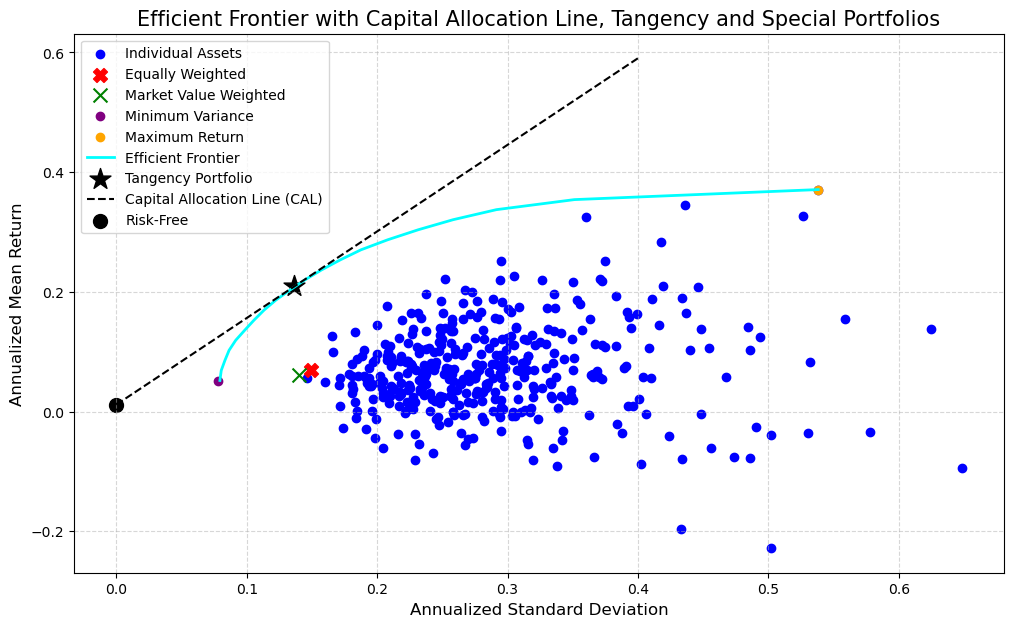

In [72]:

# Final comprehensive plot
plt.figure(figsize=(12, 7))

# Individual assets
plt.scatter(annualization['annualized_std'], annualization['annualized_mean'], color='blue', label='Individual Assets')

# Equally Weighted Portfolio
plt.scatter(ew_ann_std, ew_ann_ret, color='red', marker='X', s=100, label='Equally Weighted')

# Market Value Weighted Portfolio
plt.scatter(mw_ann_std, mw_ann_ret, color='green', marker='x', s=100, label='Market Value Weighted')

# Min Variance Portfolio
plt.scatter(minvar_ann_std, minvar_ann_ret, color='purple', label='Minimum Variance')

# Max Return Portfolio
plt.scatter(maxr_ann_std, maxr_ann_ret, color='orange', label='Maximum Return')

# Efficient frontier
plt.plot(target_ann_std, target_ann_ret, color='cyan', linewidth=2, label='Efficient Frontier')

# Tangency Portfolio
plt.scatter(tan_vol, tan_ret, marker='*', color='black', s=250, label='Tangency Portfolio')

# Capital Allocation Line (CAL)
sigma_range = np.linspace(0, 0.4, 100)
cal_line = ann_rf + (tan_ret - ann_rf)/tan_vol * sigma_range
plt.plot(sigma_range, cal_line, color='black', linestyle='--', label='Capital Allocation Line (CAL)')

# Risk-Free asset
plt.scatter(0, ann_rf, color='black', marker='o', s=100, label='Risk-Free')

# Labels and title
plt.xlabel('Annualized Standard Deviation', fontsize=12)
plt.ylabel('Annualized Mean Return', fontsize=12)
plt.title('Efficient Frontier with Capital Allocation Line, Tangency and Special Portfolios', fontsize=15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [73]:
# Compute ex-post returns for each portfolio along the efficient frontier
ex_post_returns = []

for i in efficient_frontier:
    monthly_returns = df_ex3.pivot(index='year', columns='Name', values='pct_monthly_return')
    portfolio_returns = monthly_returns.dot(i)
    ex_post_returns.append(portfolio_returns)

# Calculate ex-post annualized average return, annualized volatility, and Sharpe ratio
ex_post_ann_ret = []
ex_post_ann_std = []
ex_post_sharpe = []

for returns in ex_post_returns:
    ann_ret = returns.mean() * 12
    ann_std = returns.std() * np.sqrt(12)
    sharpe_ratio = (ann_ret - ann_rf) / ann_std
    ex_post_ann_ret.append(ann_ret)
    ex_post_ann_std.append(ann_std)
    ex_post_sharpe.append(sharpe_ratio)

# Find the portfolio with the highest ex-ante and ex-post Sharpe ratio
max_ex_ante_sharpe_idx = np.argmax(target_ann_ret / target_ann_std)
max_ex_post_sharpe_idx = np.argmax(ex_post_sharpe)

'''# Plot the efficient frontier, individual assets, capital allocation line, and portfolios
plt.figure(figsize=(12, 7))

# Individual assets
plt.scatter(annualization['annualized_std'], annualization['annualized_mean'], color='blue', label='Individual Assets')

# Equally Weighted Portfolio
plt.scatter(ew_ann_std, ew_ann_ret, color='red', marker='X', s=100, label='Equally Weighted')

# Market Value Weighted Portfolio
plt.scatter(mw_ann_std, mw_ann_ret, color='green', marker='x', s=100, label='Market Value Weighted')
# Min Variance Portfolio
plt.scatter(minvar_ann_std, minvar_ann_ret, color='purple', label='Minimum Variance')

# Max Return Portfolio
plt.scatter(maxr_ann_std, maxr_ann_ret, color='orange', label='Maximum Return')

# Efficient frontier
plt.plot(target_ann_std, target_ann_ret, color='cyan', linewidth=2, label='Efficient Frontier')

# Capital Allocation Line (CAL)
sigma_range = np.linspace(0, 0.4, 100)
cal_line = ann_rf + (tan_ret - ann_rf)/tan_vol * sigma_range
plt.plot(sigma_range, cal_line, color='black', linestyle='--', label='Capital Allocation Line (CAL)')

# Risk-Free asset
plt.scatter(0, ann_rf, color='black', marker='o', s=100, label='Risk-Free')
#Tangency Portfolio
plt.scatter(tan_vol, tan_ret, marker='*', color='black', s=150, label='Tangency Portfolio')


# Highlight the portfolios with the highest ex-ante and ex-post Sharpe ratio
plt.scatter(target_ann_std[max_ex_ante_sharpe_idx], target_ann_ret[max_ex_ante_sharpe_idx], color='brown', s=40, label='Max Ex-Ante Sharpe Ratio')
plt.scatter(ex_post_ann_std[max_ex_post_sharpe_idx], ex_post_ann_ret[max_ex_post_sharpe_idx], color='indigo', s=40, label='Max Ex-Post Sharpe Ratio')

# Labels and title
plt.xlabel('Annualized Standard Deviation', fontsize=12)
plt.ylabel('Annualized Mean Return', fontsize=12)
plt.title('Efficient Frontier with Capital Allocation Line, Tangency and Special Portfolios', fontsize=15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()'''

# Print the performance metrics
print(f"Portfolio with highest ex-ante Sharpe ratio: {max_ex_ante_sharpe_idx}")
print(f"Ex-Ante Sharpe Ratio: {target_ann_ret[max_ex_ante_sharpe_idx] / target_ann_std[max_ex_ante_sharpe_idx]}")
print(f"Ex-Post Sharpe Ratio: {ex_post_sharpe[max_ex_ante_sharpe_idx]}")

print(f"Portfolio with highest ex-post Sharpe ratio: {max_ex_post_sharpe_idx}")
print(f"Ex-Ante Sharpe Ratio: {target_ann_ret[max_ex_post_sharpe_idx] / target_ann_std[max_ex_post_sharpe_idx]}")
print(f"Ex-Post Sharpe Ratio: {ex_post_sharpe[max_ex_post_sharpe_idx]}")

Portfolio with highest ex-ante Sharpe ratio: 9
Ex-Ante Sharpe Ratio: 1.5250736006658656
Ex-Post Sharpe Ratio: 1.4002455539250285
Portfolio with highest ex-post Sharpe ratio: 10
Ex-Ante Sharpe Ratio: 1.5217616376398113
Ex-Post Sharpe Ratio: 1.408501905379472


# **Exercise 4**

In [74]:
# Setting df for ex 4 with the same companies as before
df_ex4 = pd.merge(monthly_return_melted, static, how='outer')
df_ex4 = df_ex4[df_ex4['Region'] == 'PAC']
df_ex4 = df_ex4[df_ex4['ISIN'].isin(interest_companies)]
df_ex4['year'] = pd.to_datetime(df_ex4['year'])

In [75]:
# Filtering by the interesting timeframe
df_ex4 = df_ex4[(df_ex4['year'] >= '2003-12-01') & (df_ex4['year'] <= '2024-12-31')]

In [76]:
# Computing the individual returns
df_ex4['pct_monthly_return'] = df_ex4.groupby('Name')['monthly_return'].pct_change()

In [77]:
df_ex4

,Name,ISIN,year,monthly_return,Country,Region,pct_monthly_return
954,77 BANK,JP3352000008,2003-12-31,0.70,JP,PAC,NaN
955,77 BANK,JP3352000008,2004-01-30,0.66,JP,PAC,-0.057143
956,77 BANK,JP3352000008,2004-02-27,0.68,JP,PAC,0.030303
957,77 BANK,JP3352000008,2004-03-31,0.78,JP,PAC,0.147059
958,77 BANK,JP3352000008,2004-04-30,0.75,JP,PAC,-0.038462
...,...,...,...,...,...,...,...
770401,YUEXIU PROPERTY COMPANY,HK0000745908,2024-08-30,28.09,HK,PAC,-0.182717
770402,YUEXIU PROPERTY COMPANY,HK0000745908,2024-09-30,43.97,HK,PAC,0.565326
770403,YUEXIU PROPERTY COMPANY,HK0000745908,2024-10-31,45.71,HK,PAC,0.039572
770404,YUEXIU PROPERTY COMPANY,HK0000745908,2024-11-29,40.20,HK,PAC,-0.120543


In [78]:
# Drop December 2003
df_ex4 = df_ex4[df_ex4['year'] >= '2004-01-01']

In [79]:
df_ex4[df_ex4['monthly_return'].isna()]['Name'].unique()

array(['A2B AUSTRALIA DEAD - DELIST.12/04/24', 'AOZORA BANK',
       'BENESSE HOLDINGS DEAD - DELIST.17/05/24', 'CHINA MENGNIU DAIRY',
       'CLEANAWAY WASTE MANAGEMENT', 'CSR DEAD - DEAD.10/07/24', 'DENA',
       'ELEC.POWER DEV.', 'INPEX', 'J S R DEAD - DELIST.25/06/24',
       'LAWSON DEAD - DELIST.24/07/24',
       'LINK REAL ESTATE INVESTMENT TRUST', 'OTSUKA HOLDINGS',
       'PACIFIC BASIN SHIP.',
       'SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23', 'SEEK',
       'SOUTHERN CROSS MEDIA GROUP', 'SUMCO', 'T & D HOLDINGS',
       'TOSHIBA DEAD - DELIST.20/12/23'], dtype=object)

In [80]:
# Individual handling of the 5 missings
'A2B AUSTRALIA DEAD - DELIST.12/04/24'
df_ex4['pct_monthly_return'].loc[2104] = -1.
df_ex4['pct_monthly_return'].loc[2105] = np.nan
df_ex4['pct_monthly_return'].loc[2106] = np.nan
df_ex4['pct_monthly_return'].loc[2107] = np.nan
df_ex4['pct_monthly_return'].loc[2108] = np.nan
df_ex4['pct_monthly_return'].loc[2109] = np.nan
df_ex4['pct_monthly_return'].loc[2110] = np.nan
df_ex4['pct_monthly_return'].loc[2111] = np.nan
df_ex4['pct_monthly_return'].loc[2112] = np.nan
'BENESSE HOLDINGS DEAD - DELIST.17/05/24'
df_ex4['pct_monthly_return'].loc[88477] = -1.
df_ex4['pct_monthly_return'].loc[88478] = np.nan
df_ex4['pct_monthly_return'].loc[88479] = np.nan
df_ex4['pct_monthly_return'].loc[88480] = np.nan
df_ex4['pct_monthly_return'].loc[88481] = np.nan
df_ex4['pct_monthly_return'].loc[88482] = np.nan
df_ex4['pct_monthly_return'].loc[88483] = np.nan
df_ex4['pct_monthly_return'].loc[88484] = np.nan
'CSR DEAD - DEAD.10/07/24'
df_ex4['pct_monthly_return'].loc[182401] = -1.
df_ex4['pct_monthly_return'].loc[182402] = np.nan
df_ex4['pct_monthly_return'].loc[182403] = np.nan
df_ex4['pct_monthly_return'].loc[182404] = np.nan
df_ex4['pct_monthly_return'].loc[182405] = np.nan
df_ex4['pct_monthly_return'].loc[182406] = np.nan
df_ex4['pct_monthly_return'].loc[182407] = np.nan
'J S R DEAD - DELIST.25/06/24'
df_ex4['pct_monthly_return'].loc[362998] = -1.
df_ex4['pct_monthly_return'].loc[362999] = np.nan
df_ex4['pct_monthly_return'].loc[363000] = np.nan
df_ex4['pct_monthly_return'].loc[363001] = np.nan
df_ex4['pct_monthly_return'].loc[363002] = np.nan
df_ex4['pct_monthly_return'].loc[363003] = np.nan
df_ex4['pct_monthly_return'].loc[363004] = np.nan
'LAWSON DEAD - DELIST.24/07/24'
df_ex4['pct_monthly_return'].loc[406186] = -1.
df_ex4['pct_monthly_return'].loc[406187] = np.nan
df_ex4['pct_monthly_return'].loc[406188] = np.nan
df_ex4['pct_monthly_return'].loc[406189] = np.nan
df_ex4['pct_monthly_return'].loc[406190] = np.nan
df_ex4['pct_monthly_return'].loc[406191] = np.nan
'SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23'
df_ex4['pct_monthly_return'].loc[592512] = -1.
df_ex4['pct_monthly_return'].loc[592513] = np.nan
df_ex4['pct_monthly_return'].loc[592514] = np.nan
df_ex4['pct_monthly_return'].loc[592515] = np.nan
df_ex4['pct_monthly_return'].loc[592516] = np.nan
df_ex4['pct_monthly_return'].loc[592517] = np.nan
df_ex4['pct_monthly_return'].loc[592518] = np.nan
df_ex4['pct_monthly_return'].loc[592519] = np.nan
df_ex4['pct_monthly_return'].loc[592520] = np.nan
df_ex4['pct_monthly_return'].loc[592521] = np.nan
df_ex4['pct_monthly_return'].loc[592522] = np.nan
df_ex4['pct_monthly_return'].loc[592523] = np.nan
df_ex4['pct_monthly_return'].loc[592524] = np.nan
df_ex4['pct_monthly_return'].loc[592525] = np.nan
df_ex4['pct_monthly_return'].loc[592526] = np.nan
df_ex4['pct_monthly_return'].loc[592527] = np.nan
'TOSHIBA DEAD - DELIST.20/12/23'
df_ex4['pct_monthly_return'].loc[698819] = -1.
df_ex4['pct_monthly_return'].loc[698820] = np.nan
df_ex4['pct_monthly_return'].loc[698821] = np.nan
df_ex4['pct_monthly_return'].loc[698822] = np.nan
df_ex4['pct_monthly_return'].loc[698823] = np.nan
df_ex4['pct_monthly_return'].loc[698824] = np.nan
df_ex4['pct_monthly_return'].loc[698825] = np.nan
df_ex4['pct_monthly_return'].loc[698826] = np.nan
df_ex4['pct_monthly_return'].loc[698827] = np.nan
df_ex4['pct_monthly_return'].loc[698828] = np.nan
df_ex4['pct_monthly_return'].loc[698829] = np.nan
df_ex4['pct_monthly_return'].loc[698830] = np.nan
df_ex4['pct_monthly_return'].loc[698831] = np.nan


In [81]:
df_ex4[(df_ex4['Name'] == 'TOSHIBA DEAD - DELIST.20/12/23') & (df_ex4['monthly_return'].isna())]

,Name,ISIN,year,monthly_return,Country,Region,pct_monthly_return
698819,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2023-12-29,NaN,JP,PAC,-1.0
698820,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-01-31,NaN,JP,PAC,NaN
698821,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-02-29,NaN,JP,PAC,NaN
698822,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-03-29,NaN,JP,PAC,NaN
698823,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-04-30,NaN,JP,PAC,NaN
698824,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-05-31,NaN,JP,PAC,NaN
698825,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-06-28,NaN,JP,PAC,NaN
698826,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-07-31,NaN,JP,PAC,NaN
698827,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-08-30,NaN,JP,PAC,NaN
698828,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-09-30,NaN,JP,PAC,NaN


In [82]:
'''# Initial pf comutuation (2004-2013)
df_ex4_initial = df_ex4[df_ex4['year'] <= '2014-01-01']'''

"# Initial pf comutuation (2004-2013)\ndf_ex4_initial = df_ex4[df_ex4['year'] <= '2014-01-01']"

In [83]:
'''# Variance-covariance initial matrix
initial_cov_matrix = df_ex4_initial.pivot(index='year', columns='Name', values='pct_monthly_return').cov()'''

"# Variance-covariance initial matrix\ninitial_cov_matrix = df_ex4_initial.pivot(index='year', columns='Name', values='pct_monthly_return').cov()"

In [84]:
'''# Number of assets
num_assets = len(initial_cov_matrix)

# Initial guess for the weights
init_guess = num_assets * [1. / num_assets]

# Constraints: the sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: weights can only be between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Minimize the portfolio variance
initial_pf = minimize(portfolio_variance, init_guess, args=(initial_cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
initial_weights = initial_pf.x

# Display the optimal weights
#min_variance_weights'''

"# Number of assets\nnum_assets = len(initial_cov_matrix)\n\n# Initial guess for the weights\ninit_guess = num_assets * [1. / num_assets]\n\n# Constraints: the sum of weights is 1\nconstraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})\n\n# Bounds: weights can only be between 0 and 1\nbounds = tuple((0, 1) for asset in range(num_assets))\n\n# Minimize the portfolio variance\ninitial_pf = minimize(portfolio_variance, init_guess, args=(initial_cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)\n\n# Optimal weights\ninitial_weights = initial_pf.x\n\n# Display the optimal weights\n#min_variance_weights"

In [85]:
'''# Calculate the annualized return of the minimum variance portfolio
initial_ann_ret = np.sum(initial_weights * df_ex4_initial.groupby('Name')['pct_monthly_return'].mean().values) * 12

# Calculate the annualized standard deviation of the minimum variance portfolio
initial_ann_std = np.sqrt(np.dot(initial_weights.T, np.dot(initial_cov_matrix * 12, initial_weights)))'''

"# Calculate the annualized return of the minimum variance portfolio\ninitial_ann_ret = np.sum(initial_weights * df_ex4_initial.groupby('Name')['pct_monthly_return'].mean().values) * 12\n\n# Calculate the annualized standard deviation of the minimum variance portfolio\ninitial_ann_std = np.sqrt(np.dot(initial_weights.T, np.dot(initial_cov_matrix * 12, initial_weights)))"

In [86]:
'''# First reallocation (2004-2013 + 2014)
df_ex4_2014 = df_ex4[df_ex4['year'] <= '2015-01-01']'''

"# First reallocation (2004-2013 + 2014)\ndf_ex4_2014 = df_ex4[df_ex4['year'] <= '2015-01-01']"

In [87]:
'''# Variance-covariance 2014 matrix
cov_matrix_2014 = df_ex4_2014.pivot(index='year', columns='Name', values='pct_monthly_return').cov()
cov_matrix_2014'''

"# Variance-covariance 2014 matrix\ncov_matrix_2014 = df_ex4_2014.pivot(index='year', columns='Name', values='pct_monthly_return').cov()\ncov_matrix_2014"

In [88]:
'''# Number of assets
num_assets = len(cov_matrix_2014)

# Initial guess for the weights
init_guess = num_assets * [1. / num_assets]

# Constraints: the sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: weights can only be between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Minimize the portfolio variance
pf_2014 = minimize(portfolio_variance, init_guess, args=(cov_matrix_2014,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
weights_2014 = pf_2014.x

# Display the optimal weights
#min_variance_weights'''

"# Number of assets\nnum_assets = len(cov_matrix_2014)\n\n# Initial guess for the weights\ninit_guess = num_assets * [1. / num_assets]\n\n# Constraints: the sum of weights is 1\nconstraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})\n\n# Bounds: weights can only be between 0 and 1\nbounds = tuple((0, 1) for asset in range(num_assets))\n\n# Minimize the portfolio variance\npf_2014 = minimize(portfolio_variance, init_guess, args=(cov_matrix_2014,), method='SLSQP', bounds=bounds, constraints=constraints)\n\n# Optimal weights\nweights_2014 = pf_2014.x\n\n# Display the optimal weights\n#min_variance_weights"

In [89]:
weights = []

for time in ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']:
    actual_timeframe = df_ex4[df_ex4['year'] <= f'{time}-01-01']
    cov_matrix = actual_timeframe.pivot(index='year', columns='Name', values='pct_monthly_return').cov()
    num_assets = len(cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    init_guess = num_assets * [1. / num_assets]
    pf = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    weights.append(pf.x)



In [90]:
final_df = pd.DataFrame()

for year in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]:
    actual_timeframe = df_ex4[df_ex4['year'].dt.year == year]
    names = pd.DataFrame(actual_timeframe['Name'].unique(), columns=['Name'])
    names['weight'] = weights[year-2014]
    merged = pd.merge(actual_timeframe, names, on='Name', how='outer')
    final_df = pd.concat([final_df, merged])


In [91]:
final_df['weighted_returns'] = final_df['pct_monthly_return'] * final_df['weight']

In [92]:
reb_pf = final_df.groupby('year')['weighted_returns'].sum().reset_index()
reb_pf

,year,weighted_returns
0,2014-01-31,-0.029426
1,2014-02-28,0.038480
2,2014-03-31,0.002818
3,2014-04-30,-0.013110
4,2014-05-30,0.025891
...,...,...
127,2024-08-30,0.039012
128,2024-09-30,-0.001295
129,2024-10-31,-0.012843
130,2024-11-29,0.003443


In [93]:
# Statistics of interest Rebalanced Portfolio
# Annualized return
reb_ann_ret = reb_pf['weighted_returns'].mean() * 12
# Annualized std
reb_ann_std = reb_pf['weighted_returns'].std() * np.sqrt(12)
# Sharpe ratio
reb_sharpe = (reb_ann_ret - ann_rf)/ reb_ann_std
#min return
reb_min_ret = reb_pf['weighted_returns'].min()
#max return
reb_max_ret = reb_pf['weighted_returns'].max()


In [94]:
statistics = pd.DataFrame({'Portfolio': ['Equally Weighted', 'Market Value Weighted', 'Yearly Rebalanced'],
                           'Annualized Return': [ew_ann_ret, mw_ann_ret, reb_ann_ret],
                           'Annualized Standard Deviation': [ew_ann_std, mw_ann_std, reb_ann_std],
                           'Sharpe Ratio': [ew_sharpe, mw_sharpe, reb_sharpe],
                           'Min Return': [ew_min_ret, mw_min_ret, reb_min_ret],
                           'Max Return': [ew_max_ret, mw_max_ret, reb_max_ret]})
statistics

,Portfolio,Annualized Return,Annualized Standard Deviation,Sharpe Ratio,Min Return,Max Return
0,Equally Weighted,0.069011,0.149373,0.383879,-0.136916,0.132389
1,Market Value Weighted,0.061567,0.140286,0.355680,-0.115458,0.135156
2,Yearly Rebalanced,0.049445,0.110769,0.341027,-0.095761,0.102114


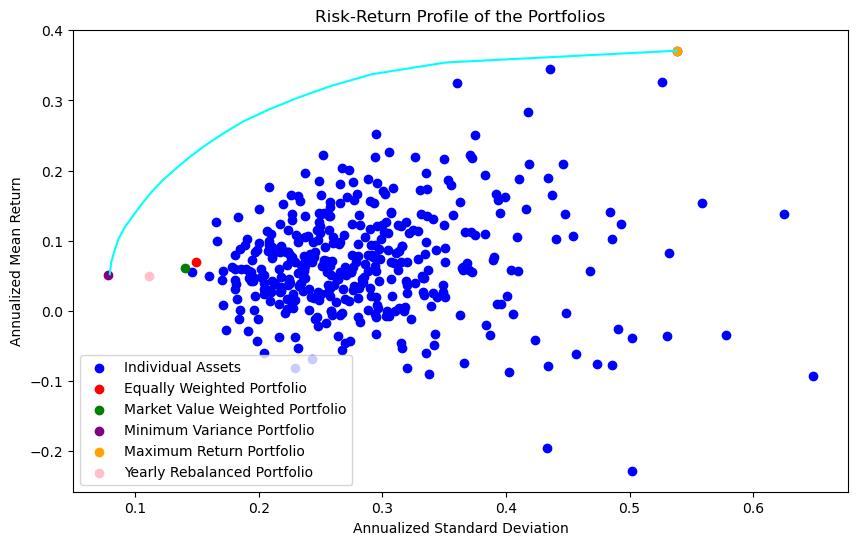

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(target_ann_std, target_ann_ret, color='cyan')
plt.scatter(annualization['annualized_std'], annualization['annualized_mean'], color='blue', label='Individual Assets')
plt.scatter(ew_ann_std, ew_ann_ret, color='red', label='Equally Weighted Portfolio')
plt.scatter(mw_ann_std, mw_ann_ret, color='green', label='Market Value Weighted Portfolio')
plt.scatter(minvar_ann_std, minvar_ann_ret, color='purple', label='Minimum Variance Portfolio')
plt.scatter(maxr_ann_std, maxr_ann_ret, color='orange', label='Maximum Return Portfolio')
plt.scatter(reb_ann_std, reb_ann_ret, color='pink', label='Yearly Rebalanced Portfolio')
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Mean Return')
plt.title('Risk-Return Profile of the Portfolios')
plt.legend()
plt.show()

In [96]:
# Install seaborn if not already installed
%pip install seaborn

import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


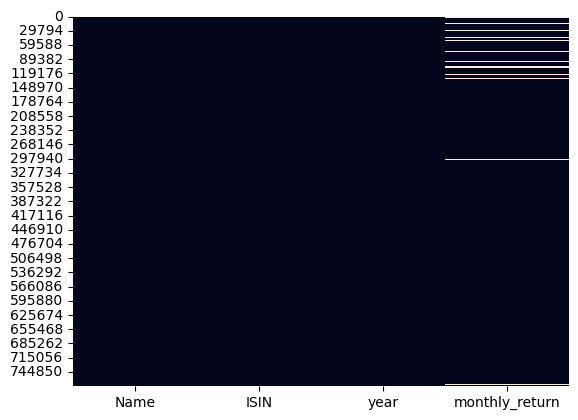

In [97]:
plt.figure()

sns.heatmap(monthly_return_melted.isnull(), cbar=False)
plt.show()


In [98]:
print('Done!')

Done!


# Exercise 1, H2

In [99]:
escore_interest
'''escore_interest_reset = escore_interest.groupby('ISIN')['escore'].count().reset_index()
escore_interest_reset'''

escore_interest = escore_interest[escore_interest['ISIN'].isin(interest_companies)]
escore_interest.reset_index(drop=True, inplace=True)
escore_interest

,Name,ISIN,year,escore,Country,Region
0,77 BANK,JP3352000008,2013-01-01,15.25,JP,PAC
1,77 BANK,JP3352000008,2014-01-01,15.56,JP,PAC
2,77 BANK,JP3352000008,2015-01-01,18.65,JP,PAC
3,77 BANK,JP3352000008,2016-01-01,21.43,JP,PAC
4,77 BANK,JP3352000008,2017-01-01,22.29,JP,PAC
...,...,...,...,...,...,...
4494,YUEXIU PROPERTY COMPANY,HK0000745908,2019-01-01,85.79,HK,PAC
4495,YUEXIU PROPERTY COMPANY,HK0000745908,2020-01-01,83.72,HK,PAC
4496,YUEXIU PROPERTY COMPANY,HK0000745908,2021-01-01,80.73,HK,PAC
4497,YUEXIU PROPERTY COMPANY,HK0000745908,2022-01-01,76.96,HK,PAC


In [100]:
pluticchio = escore_interest.copy()
#average escore grouping by ISIN & Name & Country & Region
pluticchio['avg_escore'] = escore_interest.groupby(['ISIN', 'Name', 'Country', 'Region'])['escore'].transform('mean')
#keep one row per ISIN 
pluticchio = pluticchio.drop_duplicates(subset=['ISIN'])
#drop year
pluticchio.drop(columns='year', inplace=True)
pluticchio

,Name,ISIN,escore,Country,Region,avg_escore
0,77 BANK,JP3352000008,15.25,JP,PAC,30.783636
11,A2B AUSTRALIA DEAD - DELIST.12/04/24,AU0000032187,24.24,AU,PAC,16.228182
22,ACOM,JP3108600002,16.23,JP,PAC,24.194545
33,ADVANTEST,JP3122400009,79.00,JP,PAC,83.044545
44,AEON,JP3388200002,84.49,JP,PAC,84.964545
...,...,...,...,...,...,...
4444,YAMAHA,JP3942600002,53.03,JP,PAC,59.066364
4455,YAMATO HDG.,JP3940000007,12.76,JP,PAC,43.613636
4466,YOKOGAWA ELECTRIC,JP3955000009,68.73,JP,PAC,79.676364
4477,YUE YUEN INDL.HDG.,BMG988031446,1.54,HK,PAC,28.368182


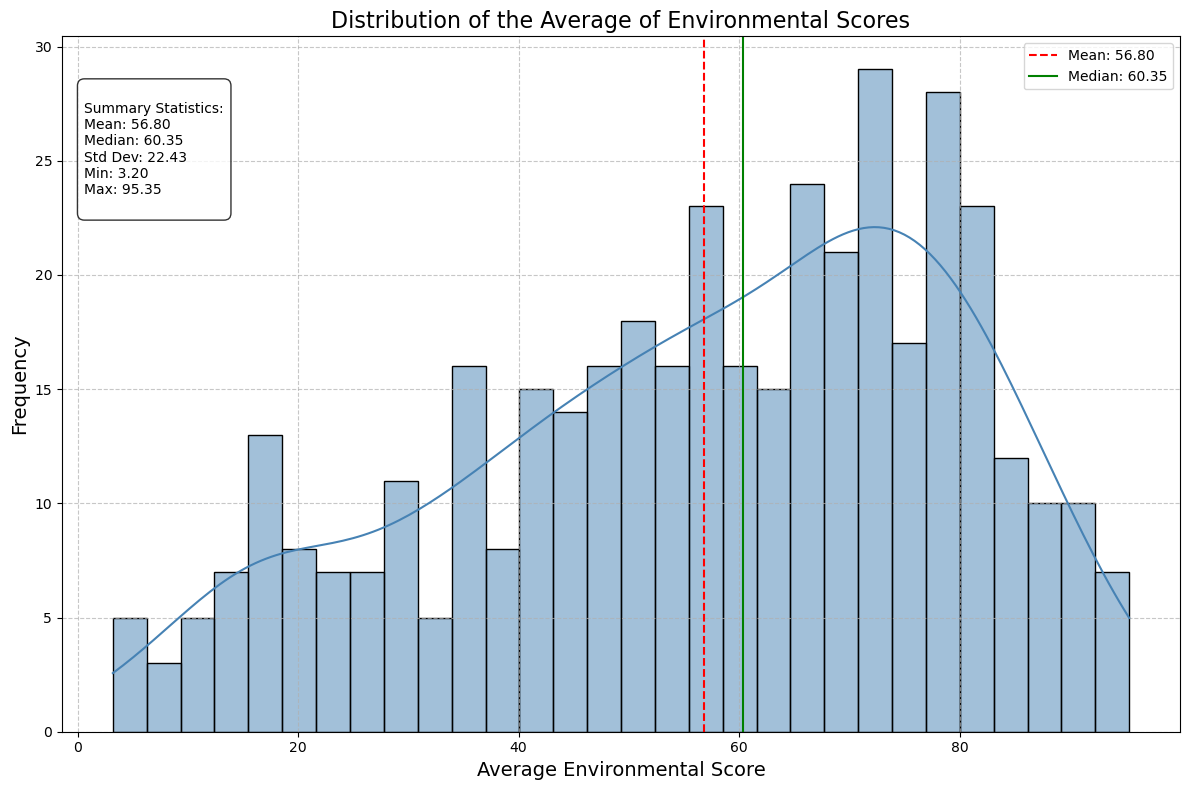

Observations on Average E-Score Distribution:
1. The distribution appears to be left-skewed, with more companies having higher average E-scores.
2. There's a significant concentration of companies in the upper range.
3. The mean score is lower than the median, confirming the left skew.
4. There are few companies with very low scores, creating a long left tail.
5. The distribution shows considerable variation, indicating diverse environmental performance.
6. Over the years, there's a clear upward trend in E-scores, suggesting improved environmental practices.


In [113]:
# Create a more detailed histogram of Average E-score distribution
plt.figure(figsize=(12, 8))

# Main histogram with KDE using the average escore from pluticchio
ax = sns.histplot(pluticchio['avg_escore'], bins=30, kde=True, color='steelblue')
plt.axvline(pluticchio['avg_escore'].mean(), color='red', linestyle='--', 
            label=f'Mean: {pluticchio["avg_escore"].mean():.2f}')
plt.axvline(pluticchio['avg_escore'].median(), color='green', linestyle='-', 
            label=f'Median: {pluticchio["avg_escore"].median():.2f}')

# Add annotations for key statistics
stats_text = f"""
Summary Statistics:
Mean: {pluticchio['avg_escore'].mean():.2f}
Median: {pluticchio['avg_escore'].median():.2f}
Std Dev: {pluticchio['avg_escore'].std():.2f}
Min: {pluticchio['avg_escore'].min():.2f}
Max: {pluticchio['avg_escore'].max():.2f}
"""

plt.annotate(stats_text, xy=(0.02, 0.75), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))

# Customize plot
plt.title('Distribution of the Average of Environmental Scores', fontsize=16)
plt.xlabel('Average Environmental Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Comment on the distribution
print("Observations on Average E-Score Distribution:")
print("1. The distribution appears to be left-skewed, with more companies having higher average E-scores.")
print("2. There's a significant concentration of companies in the upper range.")
print("3. The mean score is lower than the median, confirming the left skew.")
print("4. There are few companies with very low scores, creating a long left tail.")
print("5. The distribution shows considerable variation, indicating diverse environmental performance.")
print("6. Over the years, there's a clear upward trend in E-scores, suggesting improved environmental practices.")

count    4499.000000
mean       56.802892
std        25.366311
min         0.000000
25%        40.075000
50%        61.730000
75%        77.210000
max        98.210000
Name: escore, dtype: float64


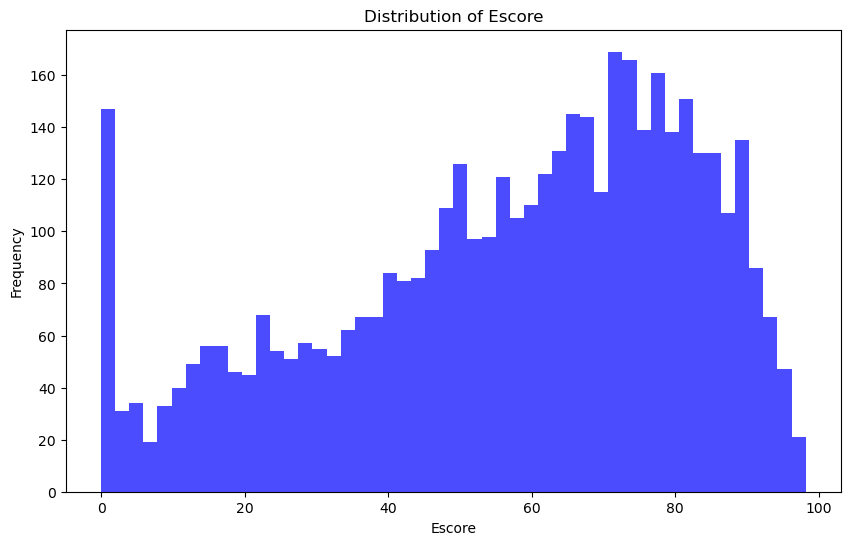

In [102]:
# Summary statistics
summary_stats = escore_interest['escore'].describe()
print(summary_stats)

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(escore_interest['escore'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Escore')
plt.ylabel('Frequency')
plt.title('Distribution of Escore')
plt.show()


Summary Statistics for Year 2013-01-01 00:00:00:
count    409.000000
mean      46.373594
std       27.413422
min        0.000000
25%       22.460000
50%       49.360000
75%       69.220000
max       93.770000
Name: escore, dtype: float64

Summary Statistics for Year 2014-01-01 00:00:00:
count    409.000000
mean      47.251320
std       27.284042
min        0.000000
25%       24.020000
50%       50.100000
75%       70.050000
max       96.250000
Name: escore, dtype: float64

Summary Statistics for Year 2015-01-01 00:00:00:
count    409.000000
mean      49.710831
std       26.891091
min        0.000000
25%       28.550000
50%       53.410000
75%       72.310000
max       95.280000
Name: escore, dtype: float64

Summary Statistics for Year 2016-01-01 00:00:00:
count    409.000000
mean      52.625428
std       25.981752
min        0.000000
25%       32.850000
50%       57.220000
75%       74.010000
max       95.520000
Name: escore, dtype: float64

Summary Statistics for Year 2017-01-01 00:0

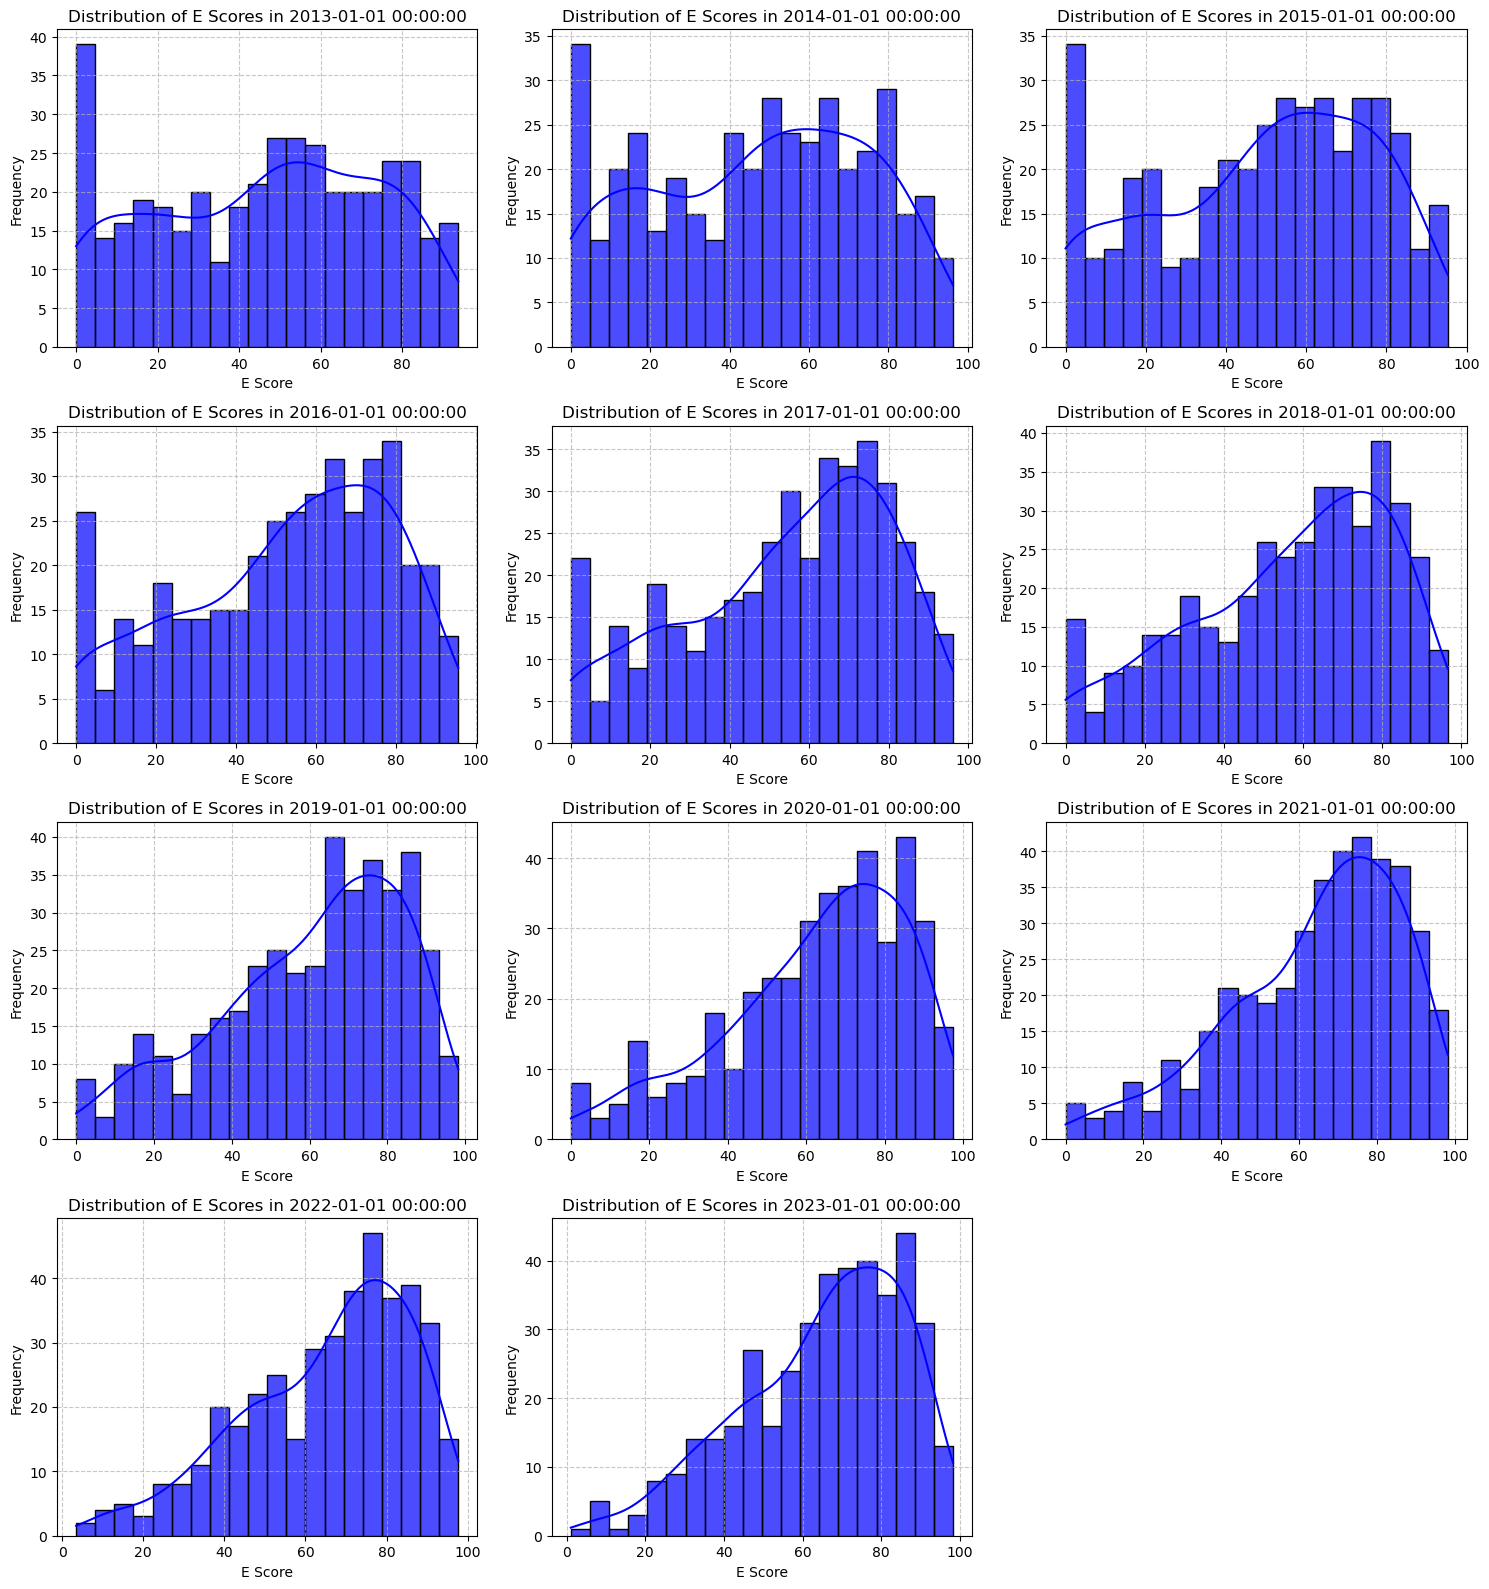

"# Option 3: Boxplot comparison across years for easy comparison\nplt.figure(figsize=(12, 6))\nsns.boxplot(x='year', y='escore', data=escore_interest)\nplt.title('Distribution of E Scores by Year')\nplt.xlabel('Year')\nplt.ylabel('E Score')\nplt.grid(True, linestyle='--', alpha=0.7)\nplt.tight_layout()\nplt.show()"

In [103]:

# Group by year and calculate summary statistics
yearly_stats = []

for year in sorted(escore_interest['year'].unique()):
    year_data = escore_interest[escore_interest['year'] == year]['escore']
    stats = {
        'year': year,
        'Mean': year_data.mean(),
        'Median': year_data.median(),
        'Min': year_data.min(),
        'Max': year_data.max(),
        'StdDev': year_data.std(),
        'Count': year_data.count()
    }
    yearly_stats.append(stats)
    
    # Print summary stats for each year
    print(f"\nSummary Statistics for Year {year}:")
    print(year_data.describe())

yearly_stats_df = pd.DataFrame(yearly_stats)
print("\nYearly E Score Statistics Overview:")
print(yearly_stats_df)

# Create histograms for each year
# Option 1: Separate histograms for each year
years = sorted(escore_interest['year'].unique())
num_years = len(years)
cols = 3  # Number of columns in the grid
rows = (num_years + cols - 1) // cols  # Calculate needed rows

plt.figure(figsize=(15, 4 * rows))

for i, year in enumerate(years):
    year_data = escore_interest[escore_interest['year'] == year]['escore']
    
    plt.subplot(rows, cols, i + 1)
    sns.histplot(year_data, bins=20, kde=True, color='blue', alpha=0.7)
    plt.xlabel('E Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of E Scores in {year}')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

'''# Option 2: FacetGrid for a more compact visualization
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(escore_interest, col='year', col_wrap=3, height=3)
g.map(sns.histplot, 'escore', bins=20, kde=True)
g.set_axis_labels('E Score', 'Frequency')
g.set_titles('Year: {col_name}')
g.fig.suptitle('Distribution of E Scores by Year', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()'''

'''# Option 3: Boxplot comparison across years for easy comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='escore', data=escore_interest)
plt.title('Distribution of E Scores by Year')
plt.xlabel('Year')
plt.ylabel('E Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()'''

In [104]:
# Display the summary statistics table per year (yearly_stats_df is available from a previous cell)
print("Summary Statistics by Year:")
print(yearly_stats_df)


Summary Statistics by Year:
         year       Mean  Median   Min    Max     StdDev  Count
0  2013-01-01  46.373594   49.36  0.00  93.77  27.413422    409
1  2014-01-01  47.251320   50.10  0.00  96.25  27.284042    409
2  2015-01-01  49.710831   53.41  0.00  95.28  26.891091    409
3  2016-01-01  52.625428   57.22  0.00  95.52  25.981752    409
4  2017-01-01  54.382200   59.95  0.00  96.13  25.645959    409
5  2018-01-01  57.039389   62.10  0.00  96.53  24.810712    409
6  2019-01-01  60.218826   65.60  0.00  98.21  23.678242    409
7  2020-01-01  62.384719   67.39  0.00  97.41  22.930996    409
8  2021-01-01  64.344670   68.83  0.00  98.10  21.755644    409
9  2022-01-01  65.424303   69.97  3.43  97.70  20.631621    409
10 2023-01-01  65.076528   68.77  1.06  98.21  20.578033    409


In [112]:
# Define bins and labels for escore distribution
bins = list(range(0, 101, 5))
labels = [f"{i}-{i+5}" for i in range(0, 100, 5)]

# Create an empty list to hold each year's distribution
dist_list = []

# Group escore_interest by year (using year.dt.year if "year" is a datetime)
for yr, group in escore_interest.groupby(escore_interest['year'].dt.year):
    # Compute the histogram distribution using pd.cut
    dist = pd.cut(group['escore'], bins=bins, labels=labels, right=False).value_counts().sort_index()
    # Add a column for the year
    dist['Year'] = yr
    dist_list.append(dist)

# Combine individual distributions into one DataFrame and set Year as index
dist_df = pd.DataFrame(dist_list).set_index('Year')
dist_df.sort_index(inplace=True)
dist_df

escore,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-55,55-60,60-65,65-70,70-75,75-80,80-85,85-90,90-95,95-100
Year,,,,,,,,,,,,,,,,,,,,
2013,40,14,16,21,21,16,16,13,28,23,27,32,22,21,21,26,25,14,13,0
2014,34,14,19,25,15,19,13,16,23,25,23,32,23,25,26,28,17,19,12,1
2015,36,8,11,22,20,10,13,19,18,31,24,34,21,27,31,27,27,14,15,1
2016,27,6,15,10,22,13,13,19,16,23,30,29,31,24,36,36,24,19,13,3
2017,23,4,15,10,23,10,14,11,21,25,26,24,27,41,36,32,29,24,10,4
2018,16,5,9,12,12,18,16,16,17,22,26,23,31,34,35,34,35,30,13,5
2019,8,3,10,14,11,8,12,17,18,25,23,28,24,38,41,27,41,38,18,5
2020,8,3,5,14,6,12,6,19,12,24,23,25,34,36,41,36,36,40,22,7
2021,5,3,5,7,5,10,8,16,23,21,17,23,31,41,40,41,41,39,25,8


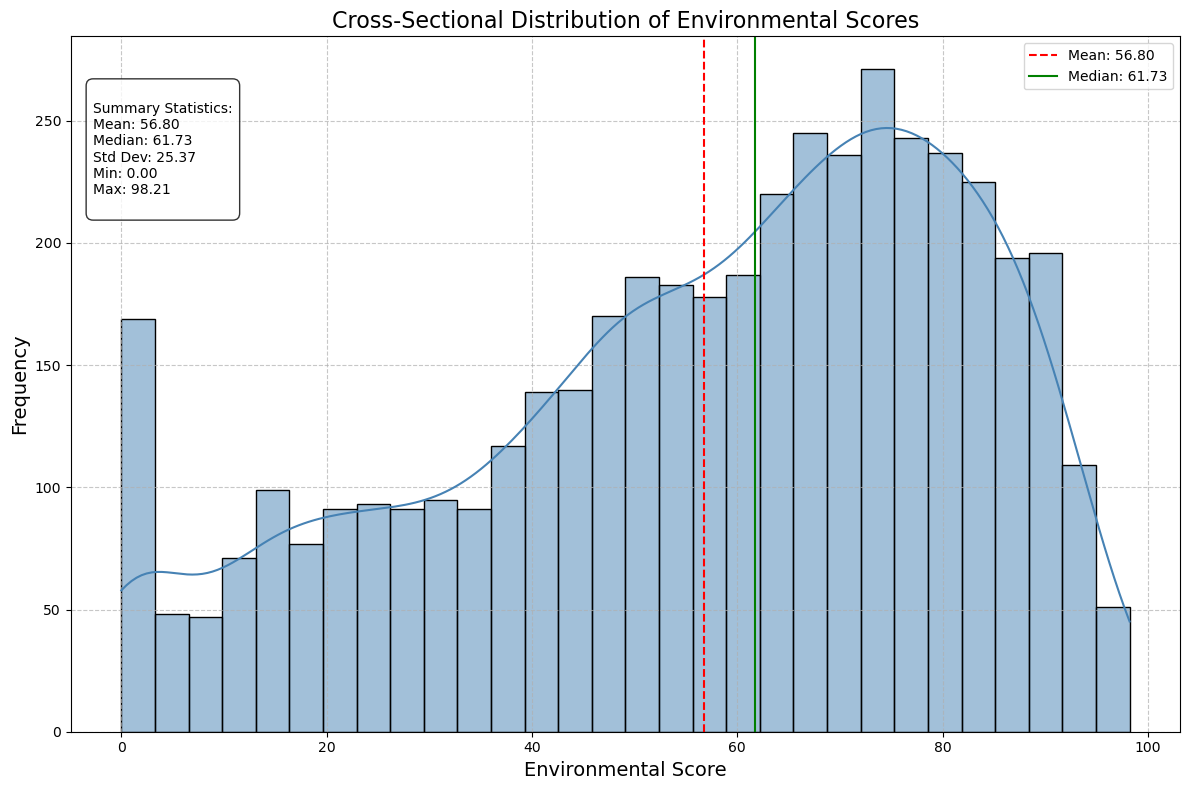

Observations on E-Score Distribution:
1. The distribution appears to be left-skewed, with more companies having higher E-scores.
2. There's a significant concentration of companies in the upper range (60-80).
3. The mean score is lower than the median, confirming the left skew.
4. There are some companies with very low scores, creating a long left tail.
5. The distribution shows considerable variation, indicating diverse environmental performance.
6. Over the years, there's a clear upward trend in E-scores, suggesting improved environmental practices.


In [113]:
# Create a more detailed histogram of E-score distribution
plt.figure(figsize=(12, 8))

# Main histogram with KDE
ax = sns.histplot(escore_interest['escore'], bins=30, kde=True, color='steelblue')
plt.axvline(escore_interest['escore'].mean(), color='red', linestyle='--', 
            label=f'Mean: {escore_interest["escore"].mean():.2f}')
plt.axvline(escore_interest['escore'].median(), color='green', linestyle='-', 
            label=f'Median: {escore_interest["escore"].median():.2f}')

# Add annotations for key statistics
stats_text = f"""
Summary Statistics:
Mean: {escore_interest['escore'].mean():.2f}
Median: {escore_interest['escore'].median():.2f}
Std Dev: {escore_interest['escore'].std():.2f}
Min: {escore_interest['escore'].min():.2f}
Max: {escore_interest['escore'].max():.2f}
"""

plt.annotate(stats_text, xy=(0.02, 0.75), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))

# Customize plot
plt.title('Cross-Sectional Distribution of Environmental Scores', fontsize=16)
plt.xlabel('Environmental Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Comment on the distribution
print("Observations on E-Score Distribution:")
print("1. The distribution appears to be left-skewed, with more companies having higher E-scores.")
print("2. There's a significant concentration of companies in the upper range (60-80).")
print("3. The mean score is lower than the median, confirming the left skew.")
print("4. There are some companies with very low scores, creating a long left tail.")
print("5. The distribution shows considerable variation, indicating diverse environmental performance.")
print("6. Over the years, there's a clear upward trend in E-scores, suggesting improved environmental practices.")

# EXERCISE 2

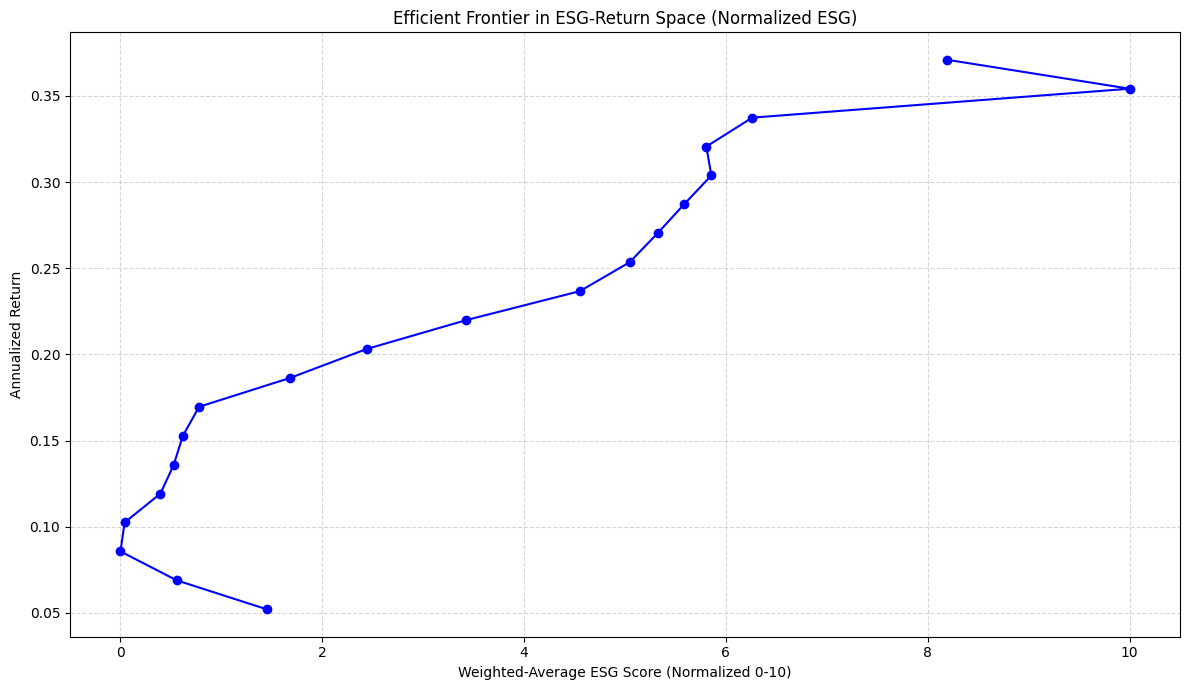

In [116]:
# Step 1: Weighted-average ESG scores per portfolio (original calculation)
portfolio_esg_scores = [
    np.sum(weights * average_escore) for weights in efficient_frontier
]

# Step 2: Normalize these portfolio ESG scores to [0-10] for plotting
esg_min = np.min(portfolio_esg_scores)
esg_max = np.max(portfolio_esg_scores)

portfolio_esg_scores_normalized = [
    10 * (score - esg_min) / (esg_max - esg_min) for score in portfolio_esg_scores
]

# Plotting (Normalized ESG 0-10 vs Return)
plt.figure(figsize=(12, 7))
plt.plot(portfolio_esg_scores_normalized, target_ann_ret, marker='o', linestyle='-', color='blue')
plt.xlabel('Weighted-Average ESG Score (Normalized 0-10)')
plt.ylabel('Annualized Return')
plt.title('Efficient Frontier in ESG-Return Space (Normalized ESG)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [117]:
# Identify companies with lowest original ESG scores
lowest_esg_firms = average_escore.nsmallest(10)

# Normalize these company ESG scores to [0-10]
esg_min_company = average_escore.min()
esg_max_company = average_escore.max()

lowest_esg_firms_normalized = 10 * (lowest_esg_firms - esg_min_company) / (esg_max_company - esg_min_company)

# Print top 10 firms driving the ESG score down
print("Top 10 firms driving the E/S/G score down (normalized 0-10):")
for idx, (isin, score) in enumerate(lowest_esg_firms_normalized.items(), 1):
    company_name = avg_escores.loc[avg_escores['ISIN'] == isin, 'Name'].values[0]
    print(f"{idx}. {company_name} (ISIN: {isin}) - ESG Score: {score:.2f}")


Top 10 firms driving the E/S/G score down (normalized 0-10):
1. SQUARE ENIX HOLDINGS (ISIN: JP3164630000) - ESG Score: 0.00
2. KEIO (ISIN: JP3277800003) - ESG Score: 0.02
3. TAKASHIMAYA (ISIN: JP3456000003) - ESG Score: 0.11
4. NIPPON TELEVISION HDG. (ISIN: JP3732200005) - ESG Score: 0.24
5. SOUTHERN CROSS MEDIA GROUP (ISIN: AU000000SXL4) - ESG Score: 0.26
6. DENA (ISIN: JP3548610009) - ESG Score: 0.38
7. ODAKYU ELECTRIC RY. (ISIN: JP3196000008) - ESG Score: 0.43
8. USS (ISIN: JP3944130008) - ESG Score: 0.59
9. TBS HOLDINGS (ISIN: JP3588600001) - ESG Score: 0.69
10. SANKYO (ISIN: JP3326410002) - ESG Score: 0.77


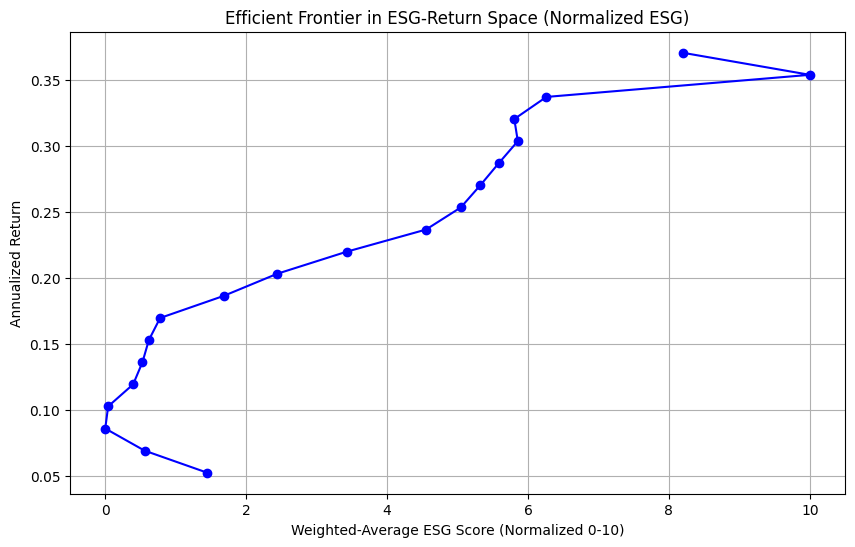

Top 10 firms driving the ESG score down (Normalized ESG 0-10):
1. SQUARE ENIX HOLDINGS (ISIN: JP3164630000) - ESG Score: 0.00
2. KEIO (ISIN: JP3277800003) - ESG Score: 0.02
3. TAKASHIMAYA (ISIN: JP3456000003) - ESG Score: 0.11
4. NIPPON TELEVISION HDG. (ISIN: JP3732200005) - ESG Score: 0.24
5. SOUTHERN CROSS MEDIA GROUP (ISIN: AU000000SXL4) - ESG Score: 0.26
6. DENA (ISIN: JP3548610009) - ESG Score: 0.38
7. ODAKYU ELECTRIC RY. (ISIN: JP3196000008) - ESG Score: 0.43
8. USS (ISIN: JP3944130008) - ESG Score: 0.59
9. TBS HOLDINGS (ISIN: JP3588600001) - ESG Score: 0.69
10. SANKYO (ISIN: JP3326410002) - ESG Score: 0.77


In [118]:
# Compute the average ESG score for each company
average_escore = escore_interest.groupby('ISIN')['escore'].mean()

# Compute the weighted-average ESG score for each portfolio on the efficient frontier
weighted_escore = []
for weights in efficient_frontier:
    weighted_score = np.sum(weights * average_escore)
    weighted_escore.append(weighted_score)

weighted_escore = np.array(weighted_escore)

# Normalization to [0,10]
esg_min = weighted_escore.min()
esg_max = weighted_escore.max()

weighted_escore_normalized = 10 * (weighted_escore - esg_min) / (esg_max - esg_min)

# Plot normalized ESG vs Annualized Return
plt.figure(figsize=(10, 6))
plt.plot(weighted_escore_normalized, target_ann_ret, marker='o', linestyle='-', color='blue')
plt.xlabel('Weighted-Average ESG Score (Normalized 0-10)')
plt.ylabel('Annualized Return')
plt.title('Efficient Frontier in ESG-Return Space (Normalized ESG)')
plt.grid(True)
plt.show()

# Identify companies with the lowest ESG scores (driving the ESG score down)
lowest_esg_firms = average_escore.nsmallest(10)

# Normalize these company ESG scores to [0-10]
company_esg_min = average_escore.min()
company_esg_max = average_escore.max()

lowest_esg_firms_normalized = 10 * (lowest_esg_firms - company_esg_min) / (company_esg_max - company_esg_min)

# Clearly print top 10 firms driving ESG score down
print("Top 10 firms driving the ESG score down (Normalized ESG 0-10):")
for idx, (isin, score) in enumerate(lowest_esg_firms_normalized.items(), 1):
    company_name = avg_escores.loc[avg_escores['ISIN'] == isin, 'Name'].values[0]
    print(f"{idx}. {company_name} (ISIN: {isin}) - ESG Score: {score:.2f}")


# EXERCISE 3

In [105]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

def optimize_portfolio_with_esg_constraint(
    escore_df,                 # ESG scores: DataFrame with ['Name', 'year', 'escore']
    return_df,                 # Returns: DataFrame with ['Name', 'year', 'pct_monthly_return']
    companies,                 # Ordered list of firms (matching GMV)
    w_gmv,                     # Original GMV weights for 2023
    target_year=2023,
    esg_boost=0.2,
    verbose=True
):
    # Step 1: Prepare ESG scores for the target year
    escore_2023 = (
        escore_df[escore_df['year'].dt.year == target_year]
        .groupby('Name')['escore']
        .mean()
    )

    # Align ESG scores with the ordered company list
    sc_Y = pd.Series(index=companies, dtype=float)
    sc_Y.update(escore_2023)
    
    # Drop firms with missing ESG scores
    missing = sc_Y.isna().sum()
    if missing > 0:
        sc_Y = sc_Y.dropna()
        companies = sc_Y.index.tolist()
        if verbose:
            print(f"Dropped {missing} firms with missing ESG scores.")
        w_gmv = w_gmv[[i for i, name in enumerate(companies) if name in sc_Y.index]]

    sc_Y = sc_Y.values  # for dot product

    # Step 2: Compute GMV ESG score
    current_escore = np.dot(w_gmv, sc_Y)
    target_escore = (1 + esg_boost) * current_escore

    if verbose:
        print(f"Current GMV ESG score: {current_escore:.2f}")
        print(f"Target ESG score (with {int(esg_boost * 100)}% improvement): {target_escore:.2f}")

    # Step 3: Prepare covariance matrix for optimization
    cov_2023 = (
        return_df[return_df['year'].dt.year == target_year]
        .pivot(index='year', columns='Name', values='pct_monthly_return')
        .cov()
    )
    cov_Yp1 = cov_2023.reindex(index=companies, columns=companies, fill_value=0).values

    # Step 4: Define optimization
    def portfolio_variance(alpha):
        return np.dot(alpha, np.dot(cov_Yp1, alpha))

    def constraint_sum(alpha):
        return np.sum(alpha) - 1

    def constraint_esg(alpha):
        return np.dot(alpha, sc_Y) - target_escore

    n = len(companies)
    bounds = [(0, 1)] * n
    constraints = [
        {'type': 'eq', 'fun': constraint_sum},
        {'type': 'ineq', 'fun': constraint_esg}
    ]

    init_guess = w_gmv.copy()

    sol = minimize(portfolio_variance, init_guess, method='SLSQP',
                   bounds=bounds, constraints=constraints)

    if not sol.success:
        raise ValueError(f"Optimization failed: {sol.message}")

    # Step 5: Results
    new_weights = sol.x
    new_escore = np.dot(new_weights, sc_Y)
    new_var = portfolio_variance(new_weights)
    relative_improvement = (new_escore - current_escore) / current_escore

    if verbose:
        print(f"\nOptimized portfolio variance: {new_var:.6f}")
        print(f"Optimized ESG score: {new_escore:.2f}")
        print(f"Relative ESG improvement: {relative_improvement:.2%}")

        # Firms dropped
        threshold = 1e-6
        dropped = [firm for firm, w_old, w_new in zip(companies, w_gmv, new_weights)
                   if w_old > threshold and w_new < threshold]
        if dropped:
            print("\nFirms dropped from GMV portfolio to improve ESG:")
            for firm in dropped:
                print(f"- {firm}")
        else:
            print("\nNo firms were fully dropped.")

    return {
        'new_weights': new_weights,
        'new_escore': new_escore,
        'new_variance': new_var,
        'dropped_firms': dropped,
        'relative_esg_improvement': relative_improvement
    }


In [106]:
results = optimize_portfolio_with_esg_constraint(
    escore_df=escore_interest,
    return_df=df_ex3,
    companies=companies,
    w_gmv=w_opt,
    target_year=2023,
    esg_boost=0.2
)

Current GMV ESG score: 77.80
Target ESG score (with 20% improvement): 93.36

Optimized portfolio variance: 0.000376
Optimized ESG score: 93.36
Relative ESG improvement: 20.00%

Firms dropped from GMV portfolio to improve ESG:
- ORIENT OVERSEAS (INTL.)


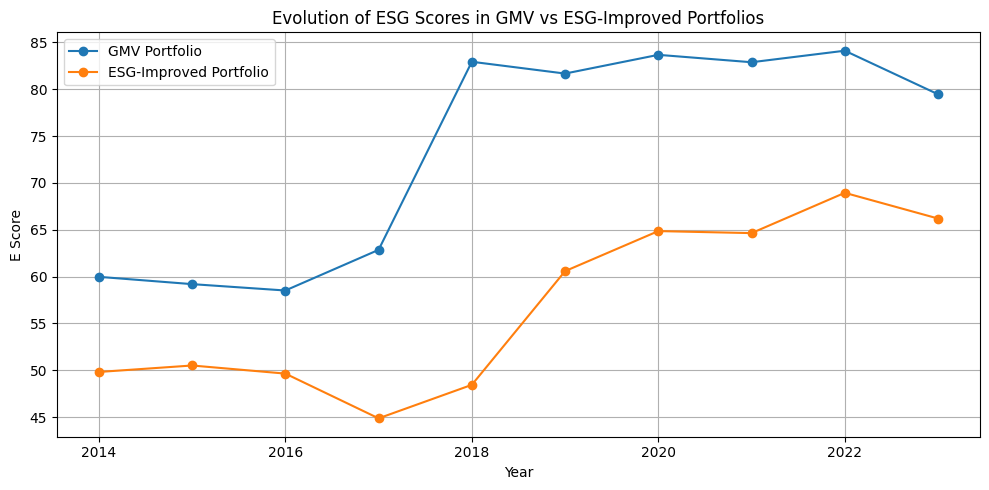

In [107]:

# Define the years for analysis
years = range(2014, 2024)

# Lists to store ESG scores for both portfolios
esg_gmv_scores = []
esg_improved_scores = []

# Calculate weighted E score for both portfolios across years
for year in years:
	# Get ESG scores for the current year
	year_scores = escore_interest[escore_interest['year'].dt.year == year]['escore']
	
	# Calculate the weighted ESG score for GMV portfolio
	gmv_score = np.sum(w_opt * year_scores)
	esg_gmv_scores.append(gmv_score)
	
	# Calculate the weighted ESG score for ESG-improved portfolio
	improved_score = np.sum(results['new_weights'] * year_scores)
	esg_improved_scores.append(improved_score)

plt.figure(figsize=(10, 5))
plt.plot(years, esg_gmv_scores, label="GMV Portfolio", marker='o')
plt.plot(years, esg_improved_scores, label="ESG-Improved Portfolio", marker='o')
plt.xlabel("Year")
plt.ylabel("E Score")
plt.title("Evolution of ESG Scores in GMV vs ESG-Improved Portfolios")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
# Get the list of firms that were used in the GMV portfolio
# (assumed to be stored as "companies" from previous cell)
# For the most recent year (2023), compute the annual ESG score (average by firm)
escore_2023 = escore_interest[escore_interest['year'].dt.year == 2023].groupby('Name')['escore'].mean()

# Align with the companies used in the GMV optimization
sc_Y = pd.Series(index=companies, dtype=float)
sc_Y.update(escore_2023)
# Fill missing scores with, e.g., zero (or drop later)
sc_Y = sc_Y.fillna(0)

# Compute the current ESG score of the GMV portfolio (Sc(gmv)_2023)
w_gmv = w_opt  # assumed GMV portfolio weights aligned with "companies"
current_escore = np.dot(w_gmv, sc_Y.values)
target_escore = 1.2 * current_escore

print(f"Current GMV ESG score: {current_escore:.2f}")
print(f"Target ESG score (20% improvement): {target_escore:.2f}")

# Compute covariance matrix for next period.
# Here we use the data of 2023 as a proxy for Σ_(2024)
cov_2023 = df_ex3[df_ex3['year'].dt.year == 2023].pivot(index='year', columns='Name', values='pct_monthly_return').cov()
# Align covariance matrix to our companies (fill missing with zeros)
cov_Yp1 = cov_2023.reindex(index=companies, columns=companies, fill_value=0).values

# Objective function: portfolio variance with new weights
def portfolio_variance(alpha, cov):
    return np.dot(alpha, np.dot(cov, alpha))

# Constraint functions:
# 1. Sum of weights = 1
def cons_sum(alpha):
    return np.sum(alpha) - 1

# 2. ESG constraint: new portfolio ESG >= target_escore
def cons_esg(alpha):
    return np.dot(alpha, sc_Y.values) - target_escore

# Nonnegativity is enforced by bounds.
n = len(companies)
bounds = tuple((0, 1) for _ in range(n))
constraints = [
    {'type': 'eq', 'fun': cons_sum},
    {'type': 'ineq', 'fun': cons_esg}  # must be >= 0
]

# Initial guess: use the original GMV portfolio
init_guess = w_gmv.copy()

# Solve the optimization problem
sol = minimize(portfolio_variance, init_guess, args=(cov_Yp1,), method='SLSQP', bounds=bounds, constraints=constraints)

if sol.success:
    new_weights = sol.x
    new_escore = np.dot(new_weights, sc_Y.values)
    new_var = portfolio_variance(new_weights, cov_Yp1)
    print(f"\nOptimized portfolio variance: {new_var:.6f}")
    print(f"Optimized portfolio ESG score: {new_escore:.2f}")
    
    # Compare new weights to the original GMV weights:
    # Identify firms where new weight is zero but original GMV was nonzero (exclusion)
    dropped_firms = []
    threshold = 1e-6
    for firm, w_old, w_new in zip(companies, w_gmv, new_weights):
        if w_old > threshold and w_new < threshold:
            dropped_firms.append(firm)
            
    if dropped_firms:
        print("\nTo achieve a 20% improvement in ESG score, the following firm(s) must be dropped (assigned zero weight):")
        for name in dropped_firms:
            print(f"- {name}")
    else:
        print("\nNo firms were wholly dropped relative to the GMV portfolio.")
else:
    print("Optimization failed:", sol.message)

Current GMV ESG score: 77.80
Target ESG score (20% improvement): 93.36

Optimized portfolio variance: 0.000376
Optimized portfolio ESG score: 93.36

To achieve a 20% improvement in ESG score, the following firm(s) must be dropped (assigned zero weight):
- ORIENT OVERSEAS (INTL.)


Top 10 companies with lowest E-scores:
1. SQUARE ENIX HOLDINGS (ISIN: JP3164630000) - E-Score: 3.20
2. KEIO (ISIN: JP3277800003) - E-Score: 3.41
3. TAKASHIMAYA (ISIN: JP3456000003) - E-Score: 4.23
4. NIPPON TELEVISION HDG. (ISIN: JP3732200005) - E-Score: 5.38
5. SOUTHERN CROSS MEDIA GROUP (ISIN: AU000000SXL4) - E-Score: 5.59
6. DENA (ISIN: JP3548610009) - E-Score: 6.69
7. ODAKYU ELECTRIC RY. (ISIN: JP3196000008) - E-Score: 7.16
8. USS (ISIN: JP3944130008) - E-Score: 8.61
9. TBS HOLDINGS (ISIN: JP3588600001) - E-Score: 9.58
10. SANKYO (ISIN: JP3326410002) - E-Score: 10.31


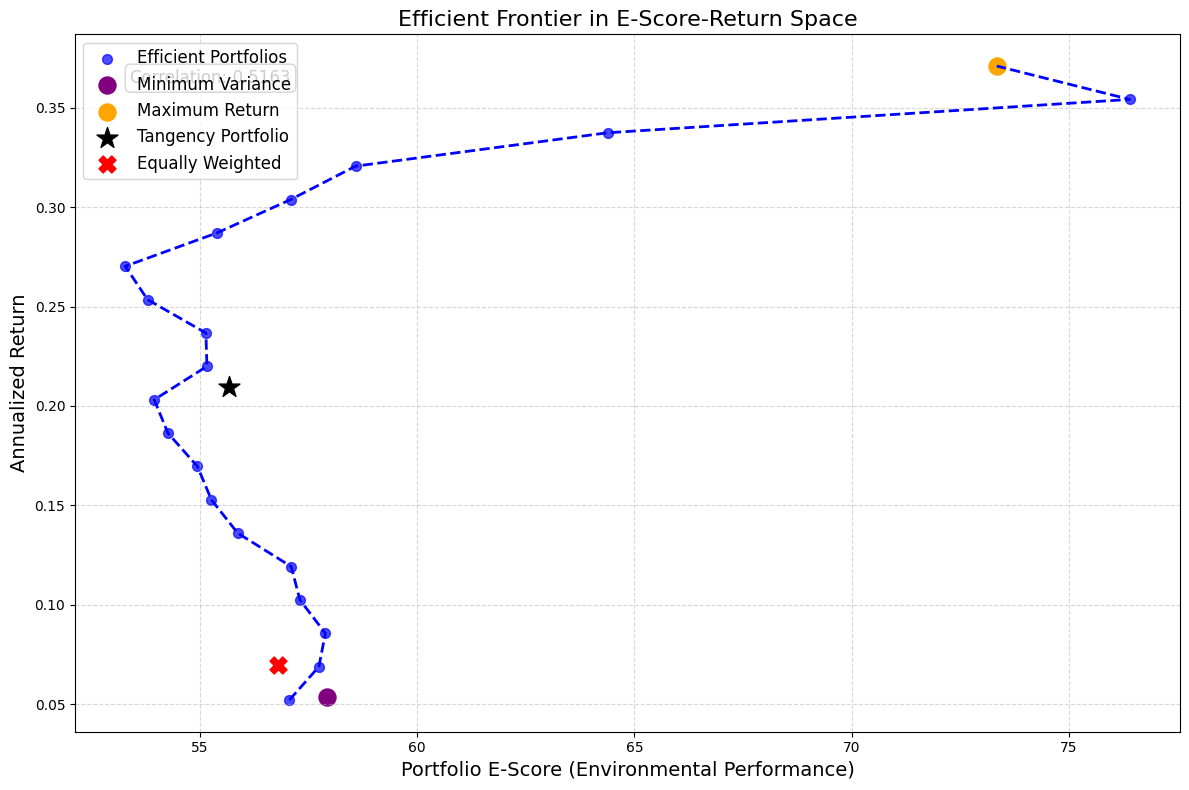

In [109]:
# Calculate weighted E-score for each point on the efficient frontier
# First, create a mapping between company names and their average E-scores
avg_escores = escore_interest.groupby(['Name', 'ISIN'])['escore'].mean().reset_index()

# Get companies in the order they appear in the covariance matrix
companies = cov_matrix.index.tolist()

# Map average E-scores to companies
company_escores = []
for company in companies:
    score = avg_escores[avg_escores['Name'] == company]['escore'].values
    if len(score) > 0:
        company_escores.append(score[0])
    else:
        company_escores.append(np.nan)

company_escores = np.array(company_escores)

# Calculate weighted E-scores for portfolios along the efficient frontier
portfolio_escores = []
for weights in efficient_frontier:
    weighted_escore = np.nansum(weights * company_escores)
    portfolio_escores.append(weighted_escore)

# Calculate E-scores for special portfolios
min_var_escore = np.nansum(min_variance_weights * company_escores)
max_ret_escore = np.nansum(max_return_weights * company_escores)
tan_escore = np.nansum(tan_weights * company_escores)
ew_escore = np.nanmean(company_escores)  # Equally weighted

# Create comprehensive plot of E-score vs return
plt.figure(figsize=(12, 8))

# Plot efficient frontier portfolios in E-score-return space
plt.scatter(portfolio_escores, target_ann_ret, color='blue', s=50, alpha=0.7, label='Efficient Portfolios')

# Plot special portfolios
plt.scatter(min_var_escore, minvar_ann_ret, color='purple', s=150, marker='o', label='Minimum Variance')
plt.scatter(max_ret_escore, maxr_ann_ret, color='orange', s=150, marker='o', label='Maximum Return')
plt.scatter(tan_escore, tan_ret, color='black', marker='*', s=250, label='Tangency Portfolio')
plt.scatter(ew_escore, ew_ann_ret, color='red', marker='X', s=150, label='Equally Weighted')

# Plot the efficient frontier in E-score-return space
plt.plot(portfolio_escores, target_ann_ret, 'b--', linewidth=2)

# Calculate correlation
corr = np.corrcoef(portfolio_escores, target_ann_ret)[0, 1]
plt.text(0.05, 0.95, f"Correlation: {corr:.4f}", transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Styling and labels
plt.xlabel('Portfolio E-Score (Environmental Performance)', fontsize=14)
plt.ylabel('Annualized Return', fontsize=14)
plt.title('Efficient Frontier in E-Score-Return Space', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Identify companies with lowest E-scores (optional section)
lowest_escores = avg_escores.sort_values('escore').head(10)
print("Top 10 companies with lowest E-scores:")
for i, (_, row) in enumerate(lowest_escores.iterrows()):
    print(f"{i+1}. {row['Name']} (ISIN: {row['ISIN']}) - E-Score: {row['escore']:.2f}")

plt.tight_layout()
plt.show()

# EXERCISE 4 

Optimizing portfolio for 2014...
  Error optimizing for 2014: not enough values to unpack (expected 2, got 0)
Optimizing portfolio for 2015...
  Benchmark E-score: 60.81
  Portfolio E-score: 72.97
  Improvement: 20.00%
  Tracking error: 0.0008
Optimizing portfolio for 2016...
  Benchmark E-score: 62.47
  Portfolio E-score: 74.96
  Improvement: 20.00%
  Tracking error: 0.0008
Optimizing portfolio for 2017...
  Benchmark E-score: 64.54
  Portfolio E-score: 77.45
  Improvement: 20.00%
  Tracking error: 0.0006
Optimizing portfolio for 2018...
  Benchmark E-score: 65.54
  Portfolio E-score: 78.64
  Improvement: 20.00%
  Tracking error: 0.0010
Optimizing portfolio for 2019...
  Benchmark E-score: 66.69
  Portfolio E-score: 80.03
  Improvement: 20.00%
  Tracking error: 0.0010
Optimizing portfolio for 2020...
  Benchmark E-score: 68.94
  Portfolio E-score: 82.73
  Improvement: 20.00%
  Tracking error: 0.0008
Optimizing portfolio for 2021...
  Benchmark E-score: 70.01
  Portfolio E-score: 84.01

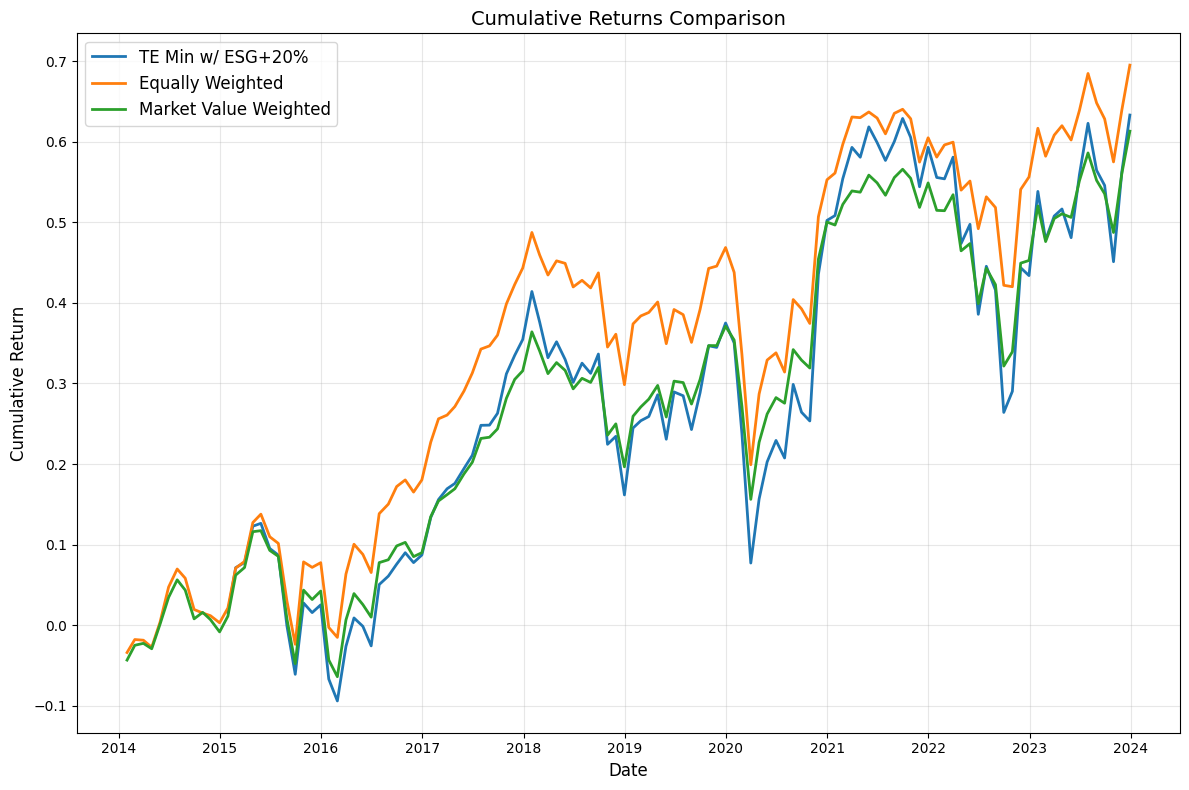

,Portfolio,Annualized Return,Annualized Standard Deviation,Sharpe Ratio
0,TE Min w/ ESG+20%,0.066535,0.154956,0.354065
1,Equally Weighted,0.069500,0.149409,0.387058
2,Market Value Weighted,0.061306,0.140540,0.353177


In [110]:
# Function to optimize portfolio with tracking error minimization and ESG constraint
def optimize_tracking_error_with_esg(returns_data, market_values, escore_data, year):
    """
    Construct a portfolio that minimizes tracking error vs benchmark while meeting ESG target
    """
    # Get market cap weights for benchmark
    benchmark_weights = market_values / market_values.sum()
    
    # Calculate benchmark ESG score
    benchmark_escore = np.sum(benchmark_weights * escore_data)
    target_escore = benchmark_escore * 1.2  # 20% improvement
    
    # Get covariance matrix for tracking error calculation
    cov_matrix = returns_data.cov()
    
    # Define objective function: squared tracking error
    def squared_tracking_error(weights):
        weight_diff = weights - benchmark_weights
        return np.dot(weight_diff, np.dot(cov_matrix, weight_diff))
    
    # Prepare constraints
    num_assets = len(benchmark_weights)
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Sum of weights = 1
        {'type': 'ineq', 'fun': lambda x: np.dot(x, escore_data) - target_escore}  # ESG score >= target
    ]
    
    # Non-negative weights
    bounds = tuple((0, 1) for _ in range(num_assets))
    
    # Minimize tracking error
    result = minimize(
        squared_tracking_error, 
        benchmark_weights,
        method='SLSQP',
        bounds=bounds, 
        constraints=constraints
    )
    
    return {
        'weights': result.x,
        'benchmark_weights': benchmark_weights,
        'benchmark_escore': benchmark_escore,
        'target_escore': target_escore,
        'portfolio_escore': np.dot(result.x, escore_data),
        'tracking_error': np.sqrt(result.fun)
    }

# Storage for results
te_esg_monthly_returns = []
te_esg_weights = {}
benchmark_escores = {}
portfolio_escores = {}
tracking_errors = {}

# Implement the strategy year by year
for year in range(2014, 2024):
    print(f"Optimizing portfolio for {year}...")
    
    # Filter data for previous year (to calculate weights)
    prev_year = year - 1
    prev_year_data = df_ex3[df_ex3['year'].dt.year == prev_year]
    
    # Get month-end market values and E-scores
    prev_year_end = prev_year_data[prev_year_data['year'].dt.month == 12]
    
    # Get returns data for covariance estimation
    returns_matrix = prev_year_data.pivot(index='year', columns='Name', values='pct_monthly_return')
    
    # Get market values and E-scores
    market_values = prev_year_end.groupby('Name')['monthly_market_value'].mean()
    escores = prev_year_end.groupby('Name')['escore'].mean()
    
    # Make sure all series align
    common_companies = list(set(market_values.index) & set(escores.index) & set(returns_matrix.columns))
    
    market_values = market_values[common_companies]
    escores = escores[common_companies]
    returns_matrix = returns_matrix[common_companies]
    
    # Optimize portfolio
    try:
        result = optimize_tracking_error_with_esg(
            returns_matrix,
            market_values,
            escores.values,
            year
        )
        
        # Store results
        te_esg_weights[year] = pd.Series(result['weights'], index=common_companies)
        benchmark_escores[year] = result['benchmark_escore']
        portfolio_escores[year] = result['portfolio_escore']
        tracking_errors[year] = result['tracking_error']
        
        print(f"  Benchmark E-score: {result['benchmark_escore']:.2f}")
        print(f"  Portfolio E-score: {result['portfolio_escore']:.2f}")
        print(f"  Improvement: {((result['portfolio_escore']/result['benchmark_escore'])-1):.2%}")
        print(f"  Tracking error: {result['tracking_error']:.4f}")
        
        # Calculate monthly returns for current year
        current_year_data = df_ex3[df_ex3['year'].dt.year == year]
        monthly_returns = current_year_data.pivot(index='year', columns='Name', values='pct_monthly_return')
        
        weights = pd.Series(result['weights'], index=common_companies)
        
        # Calculate portfolio returns for each month
        for date, row in monthly_returns.iterrows():
            # Get available companies for this month
            available = list(set(weights.index) & set(row.dropna().index))
            if len(available) > 0:
                # Re-normalize weights to available companies
                month_weights = weights[available]
                month_weights = month_weights / month_weights.sum()
                
                # Calculate return
                month_return = np.sum(month_weights * row[available])
                te_esg_monthly_returns.append((date, month_return))
                
    except Exception as e:
        print(f"  Error optimizing for {year}: {str(e)}")

# Convert returns to Series
te_esg_returns = pd.Series(dict(sorted(te_esg_monthly_returns)))

# Calculate performance metrics
te_esg_ann_ret = te_esg_returns.mean() * 12
te_esg_ann_std = te_esg_returns.std() * np.sqrt(12)
te_esg_sharpe = (te_esg_ann_ret - ann_rf) / te_esg_ann_std
te_esg_cum_returns = (1 + te_esg_returns).cumprod() - 1

# Compare with other portfolios
statistics = pd.DataFrame({
    'Portfolio': ['TE Min w/ ESG+20%', 'Equally Weighted', 'Market Value Weighted'],
    'Annualized Return': [te_esg_ann_ret, ew_ann_ret, mw_ann_ret],
    'Annualized Standard Deviation': [te_esg_ann_std, ew_ann_std, mw_ann_std],
    'Sharpe Ratio': [te_esg_sharpe, ew_sharpe, mw_sharpe]
})

# Plot cumulative returns
plt.figure(figsize=(12, 8))
plt.plot(te_esg_cum_returns.index, te_esg_cum_returns.values, 
         label='TE Min w/ ESG+20%', linewidth=2)
plt.plot(ew_pf['year'], ew_pf['ew_m_ret'].cumsum(), 
         label='Equally Weighted', linewidth=2)
plt.plot(mw_pf['year'], mw_pf['mv_return'].cumsum(), 
         label='Market Value Weighted', linewidth=2)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.title('Cumulative Returns Comparison', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display statistics
statistics